## Parte 2 - Classificação binária

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.spatial import distance
from scipy import stats

### a) Distribuição dos padrões no espaço original

Carregamos e mostramos os dados

In [2]:
M = pd.read_csv("data/two_moons.csv")

C0 = M.loc[M["y"] == 0].values[:,1:3]
C1 = M.loc[M["y"] == 1].values[:,1:3]

Mostramos os dados no seu espaço original:

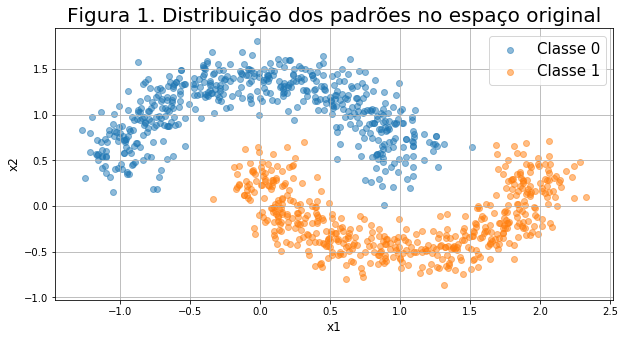

In [3]:
plt.figure(1, figsize=(10,5))
plt.scatter(C0[:,0], C0[:,1], alpha=0.5, label="Classe 0")
plt.scatter(C1[:,0], C1[:,1], alpha=0.5, label="Classe 1")
plt.title("Figura 1. Distribuição dos padrões no espaço original", fontsize=20)
plt.legend(fontsize=15)
plt.xlabel("x1", fontsize=12)
plt.ylabel("x2", fontsize=12)
plt.grid()
plt.show()

Na Fig.1 vemos que o classificador linear, dependente só dos atributos $x_1$ e $x_2$, vai falhar sempre para o grupo de dados, da mesma classe, que cruce a fronteira de decisão $L$. Isso porque a fronteira de decisão é uma linha reta do tipo $L: g(\mathbf{x})=w_2x_2 + w_1x_1+w_0 =0$, pela qual, uma parte dos dados será classificada incorretamente porque as classes têm forma de arco y cruzarão qualquer reta no plano que tente dividi-las em classes diferentes. Um bom classificador linear cruzaria as áreas menos concentradas para minimizar o número de dados erroneamente classificados.

Como a forma das classes no espaço  não é reconhecida, uma opção é incluir termos polinomiais dos atributos para achar uma fronteira de decisão não linear que siga a forma dos dados.

### b) Discriminante linear de Fisher

O Discriminante Linear de Fisher procura um vetor $\mathbf{w}=\binom{w_1}{w_2}$ sobre o qual projetar os dados para reducir as dimensões do espaço original.


+ **Projeção $ŷ(i)$ de um padrão $x(i)$ sobre $\mathbf{w}$:**

\begin{align}
ŷ(i)=\frac{\mathbf{w}^Tx(i)}{||\mathbf{w}||}
\end{align}

Além disso, o vetor deve, ao mesmo tempo, maximizar a distância entre as médias das projeções de classes diferentes, ou variância inter-classe, e minimizar a variância das projeções de uma mesma classe, ou variância intra-classe. Para duas classes temos:


+ **Variância inter-classe:**

\begin{align}
(\mu_1-\mu_2)^2
\end{align}

+ Matriz de variância inter-classe:

\begin{align}
S_B = (\mu_{o1}-\mu_{o2})(\mu_{o1}-\mu_{o2})^T
\end{align}

Onde $\mu_k$ é a média das projeções dos dados da classe $C_k$, e $\mu_{ok}$ é a média no espaço original dos dados da mesma classe $C_k$. 


+ **Variância intra-classe:**

\begin{align}
s_{k}^2=\sum_{i\epsilon C_k}(ŷ(i)-\mu_k)^2
\end{align}

+ Matriz de covariância intra-classe:

\begin{align}
S_w = \sum_{i\epsilon C_1}(x(i)-\mu_{o1})(x(i)-\mu_{o1})^T+\sum_{i\epsilon C_2}(x(i)-\mu_{o2})(x(i)-\mu_{o2})^T
\end{align}

O anterior equivale a maximizar a função $J(\mathbf{w})$, ou criterio de Fisher.

+ **Criterio de Fisher:**

\begin{align}
J(\mathbf{w})=\frac{(\mu_1-\mu_2)^2}{s_{1}^2+s_{2}^2}=\frac{\mathbf{w}^TS_B\mathbf{w}}{\mathbf{w}^TS_w\mathbf{w}}
\end{align}

+ Solução

\begin{align}
\mathbf{w} = argmax \, J(\mathbf{w})\, \, \propto \, \, S_{w}^{-1}(\mu_{o1}-\mu_{o2})
\end{align}

**Nota:** O sentido e magnitude do vetor $\mathbf{w}$ não são relevantes.

Calculamos o vetor da direção ótima de projeção: $\mathbf{w}$

In [4]:
Sw = np.cov(C0.T)+np.cov(C1.T)
w = np.dot(np.linalg.inv(Sw), np.mean(C0.T, axis=1)-np.mean(C1.T, axis=1)).T
w = -w/np.linalg.norm(w) # fazemos ||w|| = 1, só precisamos a direção, o sentido e magnitude não são relevantes

Calculamos as projeções no vetor $\mathbf{w}$: Ŷ e os $\mu_k$

In [5]:
Ŷ0 = np.dot(w.T, C0.T) #projeção dos dados x que pertencem a C0
Ŷ1 = np.dot(w.T, C1.T) #projeção dos dados x que pertencem a C0

mu0 = np.mean(Ŷ0) #media das projecõis
mu1 = np.mean(Ŷ1) #media das projecõis

Mostramos o vetor ótimo de projeção $\mathbf{w}$ as médias projetadas e os histogramas:

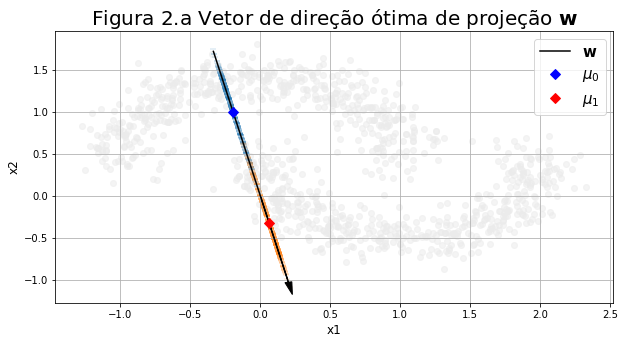

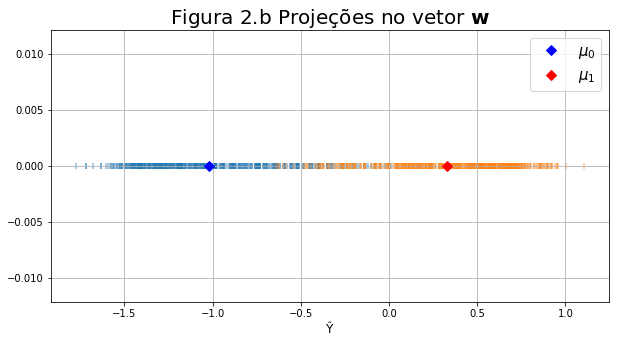

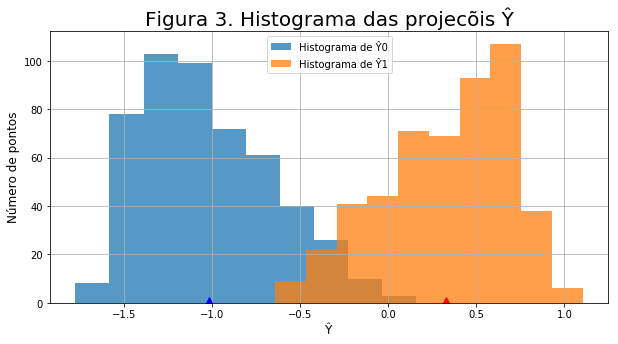

Vetor da direção ótima de projeção: w.T = [ 0.19155443 -0.98148199]
Média das projeçõis da classe 0: mu0 = -1.0178863411116206
Média das projeçõis da classe 1: mu1 = 0.33051422198447905
Nota: Vamos a considerar como direita o sentido do vetor


In [6]:
plt.figure(2.1, figsize=(10,5))
plt.scatter(C0[:,0], C0[:,1], c="0.92", alpha=0.5)                  #dados
plt.scatter(C1[:,0], C1[:,1], c="0.92", alpha=0.5)
plt.plot(w[0]*np.arange(-1.75,1.25,0.1), w[1]*np.arange(-1.75,1.25,0.1),"k", label="$\mathbf{w}$")   #vetor w
plt.arrow(0, 0, 1.05*w[0], 1.05*w[1], head_width=0.05, head_length=0.15, fc='k', ec='k')
plt.plot(mu0*w[0], mu0*w[1], "bD", markersize=7, label="$\mu_0$")   #médias das projeções
plt.plot(mu1*w[0], mu1*w[1], "rD", markersize=7, label="$\mu_1$")
plt.scatter(Ŷ0*w[0], Ŷ0*w[1], marker="_", alpha=0.15)                #projeções
plt.scatter(Ŷ1*w[0], Ŷ1*w[1], marker="_", alpha=0.15)
plt.title("Figura 2.a Vetor de direção ótima de projeção $\mathbf{w}$", fontsize=20)
plt.legend(fontsize=15)
plt.xlabel("x1", fontsize=12)
plt.ylabel("x2", fontsize=12)
plt.grid()
plt.show()

plt.figure(2.2, figsize=(10,5))
#plt.arrow(1, 0, .15, 0, width = 0.00001, head_width=0.0001, head_length=0.05, fc='k', ec='k')   #vetor w
#plt.plot(np.arange(-1.75,1.1,0.1), 0*np.arange(-1.75,1.1,0.1), "k", alpha=0.7, label="$\mathbf{w}$")

plt.scatter(Ŷ0, 0*Ŷ0, marker="|", alpha=0.5)                                                    #projeções
plt.scatter(Ŷ1, 0*Ŷ1, marker="|", alpha=0.5)
plt.plot(mu0, 0, "bD", markersize=7, label="$\mu_0$")
plt.plot(mu1, 0, "rD", markersize=7, label="$\mu_1$")
plt.title("Figura 2.b Projeções no vetor $\mathbf{w}$", fontsize=20)
plt.legend(fontsize=15)
plt.xlabel("Ŷ", fontsize=12)
plt.grid()
plt.show()

plt.figure(3, figsize=(10,5))
plt.hist(Ŷ0, alpha=0.75, label="Histograma de Ŷ0")
plt.hist(Ŷ1, alpha=0.75, label="Histograma de Ŷ1")
plt.plot(mu0, 0, "bd", markersize=8)
plt.plot(mu1, 0, "rd", markersize=8)
plt.title("Figura 3. Histograma das projecõis Ŷ", fontsize=20)
plt.xlabel("Ŷ", fontsize=12)
plt.ylabel("Número de pontos", fontsize=12)
plt.legend()
plt.grid()
plt.show()

print("Vetor da direção ótima de projeção: w.T = " +str(w.T))
print("Média das projeçõis da classe 0: mu0 = " +str(mu0))
print("Média das projeçõis da classe 1: mu1 = " +str(mu1))
print("Nota: Vamos a considerar como direita o sentido do vetor")

Nas Fig.2, vemos que o $\mathbf{w}$ que faz maximizo ao criterio de Fisher, $J(\mathbf{w})$, define uma linha ótima de projeção, tal que as médias das projecõis das classes estão separadas ao máximo e a superposição das projecões é minima.

Na Fig.3 os histogramas das projeções mostram que as classes estão mais concentradas á esquerda e direita das suas médias, respectivamente, e a sobreposição está nas caudas.

No caso os dados estem padronizados, como temos o mesmo número de amostras para cada classe, a média das projecões seríam iguais e de signal oposto, ou seja $\mu_0=-\mu_1$.

**Nota:** Vamos a considerar como direita o sentido do vetor $\mathbf{w}$ e esquerda como o sentido oposto.

### c) Curvas ROC e $F_1$

**Etapa de decisão**

Na etapa de decisão, temos que selecionar um parâmetro $\theta$, ou threshold, necesario para decidir a classe a que um padrão pertence.

Um padrão pertence a uma classe se sua projeção é maior ou menor ao threshod $\theta$. Nosso caso temos: 

\begin{align}
ŷ=\frac{\mathbf{w}^Tx}{||\mathbf{w}||}>\theta \Rightarrow x \in C_1 \\
\\
ŷ=\frac{\mathbf{w}^Tx}{||\mathbf{w}||}<\theta \Rightarrow x \in C_0
\end{align}


Temos 3 formas para obtir o $\theta$. Por facilidade vamos a usar as heurísticas:

* Heurísticas: 
\begin{align}
\theta &= \frac{\mu_0+\mu_1}{2}\\
\\
\theta &= \rho_0 \mu_0 + \rho_1 \mu_1
\end{align}

Onde $\rho_k$ representa a probabilidade *a priori* $p(y=C_k)$ da classe $C_k$. 

Em nosso caso, as classes têm o mesmo número de amostras, então:  $\rho_0=\rho_1=1/2$.

**Curva ROC**

A curva ROC é uma medida de medir o desempenho de um modelo variando o threshold de separação de classes. Quanto maior a área que a curva ROC abrange, maior é a capacidade de separação entre classes.

A curva ROC é ilustrada em um plano 2D, onde o eixo X é a **Taxa de Falsos Positivos (FPR)**, e o eixo Y é a **Taxa de Verdadeiros Positivos (TPR)**, que pode ser chamada de **recall**, ou **sensibilidade**. O cálculo dos valores dos eixos se dá por:

\begin{align}
FPR =& \frac{FP}{TN + FP}\\
\\
Recall=& \frac{TP}{TP + FN}
\end{align}

Onde FP significa Falsos Positivos, TN significa Verdadeiros Negativos, TP significa Verdadeiros Positivos e FN significa Falsos Negativos.

**$F_1$**

É uma medida que indica que o classificador obteve bons resultados, quando seu valor está perto a 1, para o recall e precisão 

\begin{align}
F_1 = 2\frac{Recall \cdot Precision}{Recall+Precision}
\end{align}

onde:

\begin{align}
Precision = \frac{TP}{TP + FP}
\end{align}

Definimos um função para calcular as métricas

In [7]:
def get_metrics(threshold, pos_projections, neg_projections):
    """
    pos_projections : projections of the known positive class
    neg_projections : projections of the known negative class
    """
    
    recall    = np.zeros((len(threshold)))
    fpr       = np.zeros((len(threshold)))
    precision = np.zeros((len(threshold)))
    
    for i in range(len(threshold)):
        recall[i] = len(np.argwhere(pos_projections > threshold[i]))/len(pos_projections)  
        fpr[i] = len(np.argwhere(neg_projections > threshold[i]))/len(neg_projections)
        if len(np.argwhere(neg_projections > threshold[i])) + len(np.argwhere(pos_projections > threshold[i]))==0:
            precision[i]=1
        else:
            precision[i] = len(np.argwhere(pos_projections > threshold[i])) \
            /(len(np.argwhere(neg_projections > threshold[i])) + len(np.argwhere(pos_projections > threshold[i])))

    F1 = 2*np.divide(np.multiply(recall, precision), recall + precision)
    return recall, fpr, precision, F1

Usando a heurística:

In [8]:
thetah = [(mu0+mu1)/2] 
recallh, fprh, precisionh, F1h = get_metrics(thetah, Ŷ1, Ŷ0)

Usando um rango de valores para o threshold

In [9]:
thetaf = np.arange(np.min(Ŷ0),np.max(Ŷ1), 0.01)          #busca no alcance das projecois, desde a cauda até a ponta
recallf, fprf, precisionf, F1f = get_metrics(thetaf, Ŷ1, Ŷ0)

best_in =np.argmin(np.linalg.norm((fprf, recallf-1), axis=0))

Mostramos as curvas ROC e de F1

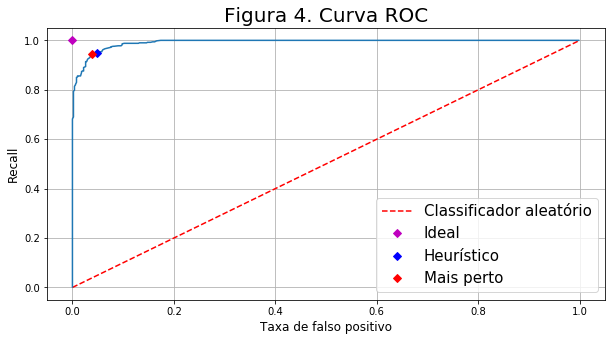

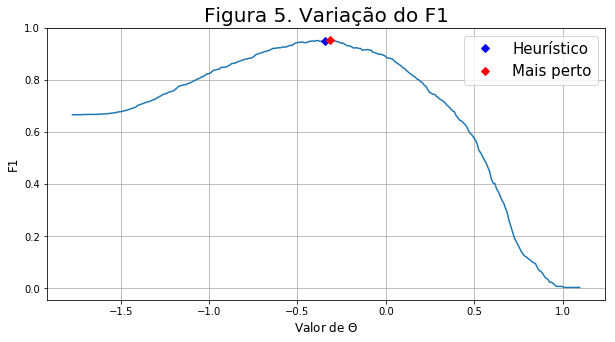

Nota: Por conveniência, definimos a classe 0 como negativa e a classe 1 como positiva


Para o threshold definido pela heurística:
Ponto azul
Theta = -0.3436860595635708
Recall = 0.95
Taxa de falso positivo : FPR = 0.048
Precisão = 0.9519038076152304
F1 = 0.950950950950951
Falsos positivos : FP = [24.]
Falsos negativos : FN = [25.]


Para o threshold que minimiza a distância ao ideal:
Ponto vermelho
Melhor Theta = -0.3130548001258664
Recall = 0.944
Taxa de falso positivo : FPR = 0.038
Precisão = 0.9613034623217923
F1 = 0.9525731584258325
Falsos positivos : FP = 19.0
Falsos negativos : FN = 28.0


In [10]:
plt.figure(4, figsize=(10,5))
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),"r", linestyle ="--", label="Classificador aleatório")
plt.plot(fprf, recallf)

plt.plot(0, 1, "mD", label="Ideal")
plt.plot(fprh, recallh,"bD", label="Heurístico")
plt.plot(fprf[best_in], recallf[best_in], "rD", label="Mais perto")

plt.title("Figura 4. Curva ROC", fontsize=20)
plt.xlabel("Taxa de falso positivo", fontsize=12)
plt.ylabel("Recall", fontsize=12)
plt.legend(fontsize=15)
plt.grid()
plt.show()


plt.figure(5, figsize=(10,5))
plt.plot(thetaf, F1f)

plt.plot(thetah, F1h ,"bD", label="Heurístico")
plt.plot(thetaf[best_in], F1f[best_in] ,"rD", label="Mais perto")

plt.title("Figura 5. Variação do F1", fontsize=20)
plt.xlabel("Valor de $\Theta$", fontsize=12)
plt.ylabel("F1", fontsize=12)
plt.legend(fontsize=15)
plt.grid()
plt.show()

print("Nota: Por conveniência, definimos a classe 0 como negativa e a classe 1 como positiva")
print("\n")
print("Para o threshold definido pela heurística:")
print("Ponto azul")
print("Theta = "+str(thetah[0]))
print("Recall = "+str(recallh[0]))
print("Taxa de falso positivo : FPR = "+str(fprh[0]))
print("Precisão = " + str(precisionh[0]))
print("F1 = " + str(F1h[0]))
print("Falsos positivos : FP = " +str(fprh*500))
print("Falsos negativos : FN = "+str(500*(1-recallh)))
print("\n")
print("Para o threshold que minimiza a distância ao ideal:")
print("Ponto vermelho")
print("Melhor Theta = "+str(thetaf[best_in]))
print("Recall = " +str(recallf[best_in].squeeze()))
print("Taxa de falso positivo : FPR = "+str(fprf[best_in].squeeze()))
print("Precisão = " + str(precisionf[best_in].squeeze()))
print("F1 = " + str(F1f[best_in].squeeze()))
print("Falsos positivos : FP = " +str(fprf[best_in]*500))
print("Falsos negativos : FN = "+str(np.round(500*(1-recallf[best_in]), 0)))

Na Fig.4 vemos que a curva ROC está acima do limite de aleatoriedade, o que indica que não classifica cegamente. Definimos o caso ideal de um classificador (ponto magenta) que não comete erros e procuramos o ponto da curva que apresente a menor distância a esse caso (ponto vermelho), com a idea que seja mais "ideal". O ponto correspondente com o threshold da heurística (ponto azul) apresenta valores só um pouco diferentes (Recall = 0.95, FPR = 0.048) ao caso mais perto ao ideal (Recall = 0.944, FPR = 0.038, vermelho). Sendo o heurístico o melhor para a classe positiva (FN = 25 < 28) e o pior para a negativa (FP = 24 > 19), mas com um número de amostras mal classificadas um pouco maior em total (49 > 47). Portanto, a seleção do threshold vai depender do critério mais importante ou da classe mais crítica para o problema. 

A FPR vai ser nula para valores positivos do threshold, aproximadamente desde $\theta \approx 0.16$ a diante, ou seja, quando a fronteira de decisão $L$ estiver á direita de todos os elementos da classe 0 (classe definida negativa). Igualmente, o recall vai ser máximo para valores de negativos do threshold, desde $\theta \approx -0.64$ a menos, ou seja, quando a fronteira de decisão $L$ estiver a esquerda de todos elementos da classe 1 (classe definida positiva). 

Na Fig. 5 vemos que a curva é parecida a uma linha reta para os primeros e ultimos valores do threshold $\theta$. Isso porque, no inicio, o recall é ótimo e constante e a precisão não muda muito, ou seja: $F_1 \approx 2\frac{0.5}{1+0.5}\approx0.67$; e, ao final, a precisão é ótima e constante mas o recall tende a cero, ou seja $F_1$ vai tender a cero.

Tambén vemos que o threshold que minimiza a distância ao classificador ideal (ponto vermelho) é o caso ótimo também para o $F_1$. Isso porque o caso ideal do ROC (ponto magenta) também é o caso ideal para a métrica $F_1$, já que não apresenta elementos mal classificados (FP = FN = 0).

Quando duas classes são igualmente importantes, o $F_1$ é um bom critério para escolher o melhor threshold.

### d) Logistic Regression

Definimos algumas funções para treinar com Logistic Regression

In [11]:
def sigmoid(x):
    return np.reciprocal(1+np.exp(-x))

In [12]:
def Je_function(input_data, labels, parameters):
    """
    Returns the Je error without regularization
    input_data.shape = (N, k+1) <Phi matrix>
    labels.shape = (N, L)
    parameters.shape = (k+1, L)
    """
    N = input_data.shape[0]
    L = labels.shape[1]      
    Je = (1/(N*L))*(-np.dot(labels.T, np.log(sigmoid(np.dot(input_data, parameters)))) \
                    -np.dot((1-labels).T, np.log(1-sigmoid(np.dot(input_data, parameters)))))
    Grad_Je = -(1/(N*L))*np.dot((labels - sigmoid(np.dot(input_data, parameters))).T, input_data)
    return Je, Grad_Je

In [13]:
def update_rule(parameters, alpha, Grad_J):
    nparameters = parameters - alpha*Grad_J.T
    return nparameters

In [14]:
def LR_train(input_data, labels, num_iterations, learning_rate):
    """
    input_data.shape = (N, k+1) <Phi matrix>
    labels.shape     = (N, 1)
    """
    parameters = np.zeros((input_data.shape[1], 1))

    list_parameters = []
    Je = np.zeros((num_iterations,1))

    for i in range(num_iterations):
        list_parameters.append(parameters)
    
        Je[i], Grad_Je = Je_function(input_data, labels, parameters) #Phi, Y standarized
        parameters = update_rule(parameters, learning_rate, Grad_Je)
    
    return list_parameters, Je
    

Carregamos os dados e construimos as matrizes Phi e Y

In [15]:
Y = M.values[:, -1].reshape((-1,1))
Phi = np.insert((M.values[:, 1:-1]), 0, 1, axis=1)

Treinamos

In [16]:
#os dados não são padronizados
params = np.zeros((Phi.shape[1],1))

it = 1000
alpha = 10

list_params, Je = LR_train(Phi, Y, it, alpha)

Calculamos as métricas para a saída do Logistic Regression

In [17]:
pyC1xC1 = sigmoid(np.dot(np.insert(C1,0,1, axis=1),list_params[-1]))
pyC1xC0 = sigmoid(np.dot(np.insert(C0,0,1, axis=1),list_params[-1]))

recall_lr_out, fpr_lr_out, precision_lr_out, F1_lr_out = get_metrics([0.5], pyC1xC1, pyC1xC0)

theta_lr = np.arange(0, 1.01, 0.0035)
recall_lr, fpr_lr, precision_lr, F1_lr = get_metrics(theta_lr, pyC1xC1, pyC1xC0)

best_inlr =np.argmin(np.linalg.norm((fpr_lr, recall_lr-1), axis=0))

Mostramos as probabilidades estimadas, as curvas ROC e F1 para o Logistic Regression apos o treinamento:

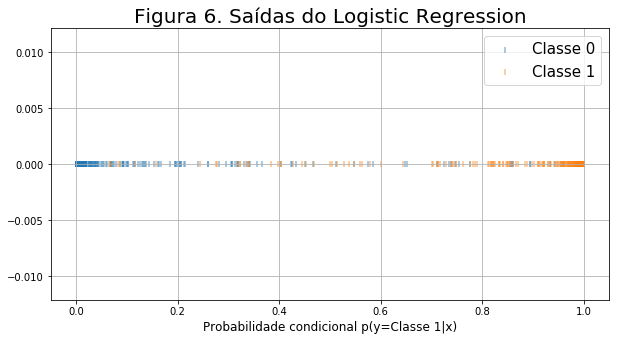

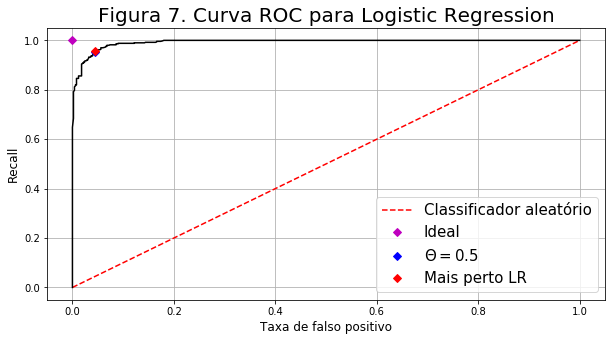

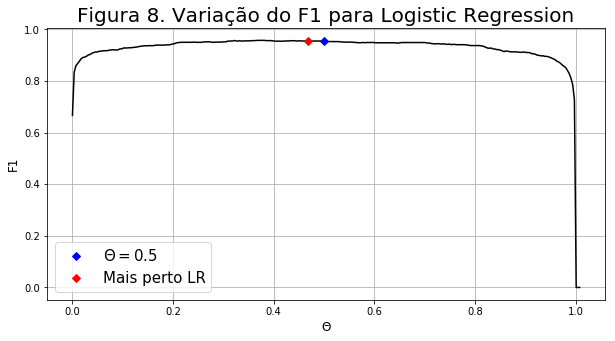

Parâmetros : w.T = [w0, w1, w2] = [[ 3.74405806  1.17690014 -9.74839689]]


Para o threshold intuitivo:
Ponto azul
Theta = 0.5
Recall = 0.954
Taxa de falso positivo : FPR = 0.044
Precisão = 0.9559118236472945
F1 = 0.9549549549549549
Falsos positivos : FP = [22.]
Falsos negativos : FN = [23.]


Para o threshold que minimiza a distância ao ideal:
Ponto vermelho
Melhor Theta = 0.46900000000000003
Recall = 0.956
Taxa de falso positivo : FPR = 0.044
Precisão = 0.956
F1 = 0.956
Falsos positivos : FP = 22.0
Falsos negativos : FN = 22.0


In [18]:
plt.figure(6, figsize=(10,5))
plt.scatter(pyC1xC0, 0*pyC1xC0, marker= "|", alpha=0.5, label="Classe 0")
plt.scatter(pyC1xC1, 0*pyC1xC1, marker= "|", alpha=0.5, label="Classe 1")

plt.title("Figura 6. Saídas do Logistic Regression", fontsize=20)
plt.xlabel("Probabilidade condicional p(y=Classe 1|x)", fontsize=12)
plt.legend(fontsize=15)
plt.grid()
plt.show()


plt.figure(7, figsize=(10,5))
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),"r", linestyle ="--", label="Classificador aleatório")
plt.plot(fpr_lr, recall_lr, "k")

plt.plot(0, 1, "mD", label="Ideal")
plt.plot(fpr_lr_out, recall_lr_out,"bD", label="$\Theta=0.5$")
plt.plot(fpr_lr[best_inlr], recall_lr[best_inlr], "rD", label="Mais perto LR")

plt.title("Figura 7. Curva ROC para Logistic Regression", fontsize=20)
plt.xlabel("Taxa de falso positivo", fontsize=12)
plt.ylabel("Recall", fontsize=12)
plt.legend(fontsize=15)
plt.grid()
plt.show()


plt.figure(8, figsize=(10,5))
plt.plot(theta_lr, F1_lr, "k")
plt.plot(0.5, F1_lr_out,"bD", label="$\Theta=0.5$")
plt.plot(theta_lr[best_inlr], F1_lr[best_inlr], "rD", label="Mais perto LR")

plt.title("Figura 8. Variação do F1 para Logistic Regression", fontsize=20)
plt.xlabel("$\Theta$", fontsize=12)
plt.ylabel("F1", fontsize=12)
plt.legend(fontsize=15)
plt.grid()
plt.show()

print("Parâmetros : w.T = [w0, w1, w2] = " + str(list_params[-1].T))
print("\n")
print("Para o threshold intuitivo:")
print("Ponto azul")
print("Theta = 0.5")
print("Recall = "+str(recall_lr_out.squeeze()))
print("Taxa de falso positivo : FPR = "+str(fpr_lr_out.squeeze()))
print("Precisão = " + str(precision_lr_out.squeeze()))
print("F1 = " + str(F1_lr_out.squeeze()))
print("Falsos positivos : FP = " +str(fpr_lr_out*500))
print("Falsos negativos : FN = "+str(500*(1-recall_lr_out)))

print("\n")
print("Para o threshold que minimiza a distância ao ideal:")
print("Ponto vermelho")
print("Melhor Theta = "+str(theta_lr[best_inlr]))
print("Recall = " +str(recall_lr[best_inlr].squeeze()))
print("Taxa de falso positivo : FPR = "+str(fpr_lr[best_inlr].squeeze()))
print("Precisão = " + str(precision_lr[best_inlr].squeeze()))
print("F1 = " + str(F1_lr[best_inlr].squeeze()))
print("Falsos positivos : FP = " +str(fpr_lr[best_inlr]*500))
print("Falsos negativos : FN = "+str(np.round(500*(1-recall_lr[best_inlr]), 0)))

Na Fig. 7 vemos que o ponto mais perto ao caso ideal ($\theta=0.469$, ponto vermelho) apresenta métricas com melhores valores que o ponto com threshold intuitivo ($\theta=0.5$, ponto azul), sem sacrificar nenhum tipo de erro. Portanto, apresenta um threshold mais confiável.

A FPR só vai ser nula para os ultimos valores do threshold, $ 0.9905 \lessapprox \theta \lessapprox 1$. Igualmente, o recall vai ser ótimo para os valores iniciais do threshold, $0 \lessapprox \theta \lessapprox 0.063$. Em ambos casos, a métrica vai depender da posição da linha de fronteira $L$. 

Na Fig. 8 vemos que a curva começa em $F_1\approx0.67$ e termina em $F_1 \approx 0$ como a curva $F_1$ anterior, sem mudar muito de valor para diferentes valores do threshold. Isso porque os valores da saída do Logistic Regression estão mais saturados para o inicio e final (ver Fig. 6) que as projeções obtidas pelo Fsiher (ver Fig 2.b). Também os espaços de busca para o threshold são diferentes.

Tambén vemos que o ponto mais perto ao ideal (F1 = 0.956, ponto vermelho) não maximiza o valor da métrica $F_1$ e, portanto, há outros valores do threshold que apresentam menos elementos mal classificados ($\theta=0.3675$, F1max = 0.9576, FP = 28, FN = 15), mas desequilibrados.

Mostramos as curvas para ambos casos e comparamos:

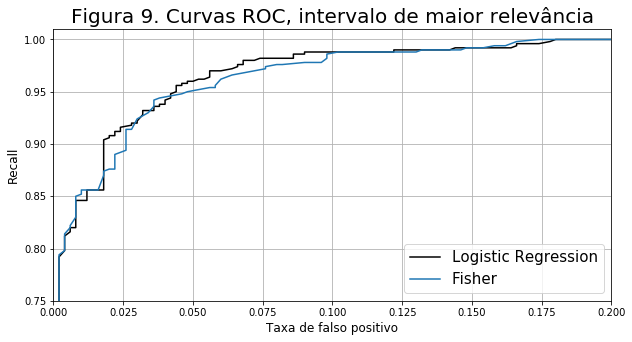

Para o classificador definido pelo Logistic Regression:
Área sob a curva ROC = 0.007252000000000001
Parâmetros : w.T = [w0, w1, w2] = [[ 3.74405806  1.17690014 -9.74839689]]


Para o classificador construído sobre o Fisher
Área sob a curva ROC = 0.007794000000000002
Vetor da direção ótima de projeção: w.T = [ 0.19155443 -0.98148199]


In [19]:
plt.figure(9, figsize=(10,5))
plt.plot(fpr_lr, recall_lr, "k", label="Logistic Regression")
plt.axis([0, 0.2, 0.75, 1.01])
plt.plot(fprf, recallf, label="Fisher")
plt.axis([0, 0.2, 0.75, 1.01])
plt.title("Figura 9. Curvas ROC, intervalo de maior relevância", fontsize=20)
plt.xlabel("Taxa de falso positivo", fontsize=12)
plt.ylabel("Recall", fontsize=12)
plt.legend(fontsize=15)
plt.grid()
plt.show()

print("Para o classificador definido pelo Logistic Regression:")
print("Área sob a curva ROC = " +str(np.abs(np.trapz(fpr_lr, recall_lr))))
print("Parâmetros : w.T = [w0, w1, w2] = " + str(list_params[-1].T))
print("\n")
print("Para o classificador construído sobre o Fisher")
print("Área sob a curva ROC = " +str(np.abs(np.trapz(fprf, recallf))))
print("Vetor da direção ótima de projeção: w.T = " +str(w.T))

Na Fig. 9 vemos que curva ROC do Logistic Regression está mais á esquerda e acima que a curva ROC obtido pelo Fisher, também sua área sob a curva é menor, o que indica que, em geral, é um melhor classificador. Isso é lógico em quanto o Fisher é uma ferramenta de redução de dimensionalidade que usamos para classificar, pois apresenta um espaço mais simple, mas não é seu objetivo. Embora, vemos também que não apresentam curvas muito distintas, pois o Logistic Regression aprende, após o treinamento, parâmetros muito parecidos ao vetor de Fisher, mas com o objetivo de classificar e não de redução de dimensionalidade, portanto com direções sempre um pouco diferentes.

Usando uma função inversa ao sigmóide sobre a saída do Logistic Regression para decidir sobre a classe positiva, temos:

\begin{align}
sigmoid(w_{0}+w_{1}x_{1}+w_{2}x_{2})>&\theta_{LR}\\
\\
w_{1}x_{1}+w_{2}x_{2}=w_{12}^{T}x>&sigmoid^{-1}(\theta_{LR})-w_{0}\\
\\
\frac{w_{12}^{T}}{||w_{12}||}x>&\frac{sigmoid^{-1}(\theta_{LR})}{||w_{12}||}-\frac{w_{0}}{||w_{12}||}
\end{align}

Se escalamos os parâmetros do Logistic Regression segundo á expressão acima, temos que os valores obtidos são, de fato, parecidos ao vetor da direção ótima de projeção do Fisher.

\begin{align}
\frac{w_{12}^{T}}{||w_{12}||} = [0.1199, -0.9928] \approx \mathbf{w}_{Fisher}^{T}=[0.1916, -0.9815]
\end{align}

Mas não serão iguais porque seus objetivos são diferentes.

Calculamos as métricas durante o treinamento do Logistic Regression

In [20]:
pyC1xC1_tr = sigmoid(np.dot(np.insert(C1,0,1, axis=1), list_params)).squeeze() #Cada coluna é a saída para novos
pyC1xC0_tr = sigmoid(np.dot(np.insert(C0,0,1, axis=1), list_params)).squeeze() #parâmetros obtidos pelo treinamento

recall_tr    = np.zeros((len(list_params),1))
fpr_tr       = np.zeros((len(list_params),1))
precision_tr = np.zeros((len(list_params),1))
F1_tr = np.zeros((len(list_params),1))

for i in range(len(list_params)):
    recall_tr[i], fpr_tr[i], precision_tr[i], F1_tr[i] = get_metrics([0.5], pyC1xC1_tr[:,i], pyC1xC0_tr[:,i])

Mostramos a evolução das curvas ROC e F1 durante o treinamento para um Threshold constante:  $\theta=0.5$

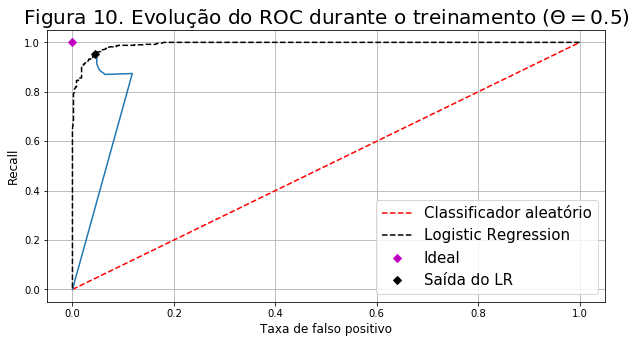

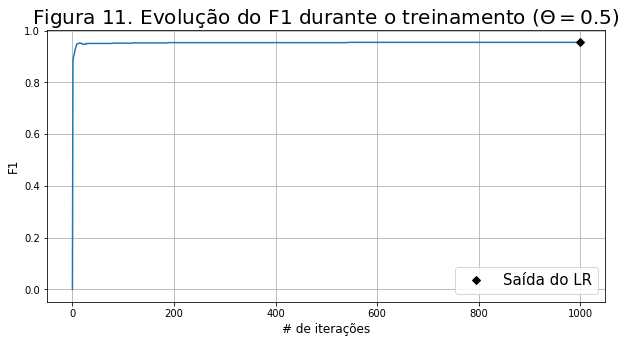

Numero de iterações = 1000
Je final = 0.10876552272598633


In [21]:
plt.figure(10, figsize=(10,5))
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),"r", linestyle ="--", label="Classificador aleatório")
plt.plot(fpr_tr, recall_tr)
plt.plot(fpr_lr, recall_lr, "k--", label="Logistic Regression")

plt.plot(0, 1, "mD", label="Ideal")
plt.plot(fpr_lr_out, recall_lr_out,"kD", label="Saída do LR")

plt.title("Figura 10. Evolução do ROC durante o treinamento ($\Theta=0.5$)", fontsize=20)
plt.xlabel("Taxa de falso positivo", fontsize=12)
plt.ylabel("Recall", fontsize=12)
plt.legend(fontsize=15)
plt.grid()
plt.show()

plt.figure(11, figsize=(10,5))
plt.plot(np.arange(len(list_params)), F1_tr)
plt.plot(len(list_params)-1, F1_lr_out,"kD", label="Saída do LR")

plt.title("Figura 11. Evolução do F1 durante o treinamento ($\Theta=0.5$)", fontsize=20)
plt.xlabel("# de iterações", fontsize=12)
plt.ylabel("F1", fontsize=12)
plt.legend(fontsize=15)
plt.grid()
plt.show()

print("Numero de iterações = " + str(it))
print("Je final = " + str(Je[-1].squeeze()))

Na Fig. 10 vemos que o Logistic Regression melhora rapidamente o Recall, sacrificando só um pouco o FPR para depoís corregir. Ainda se aumentamos o número de iterações, a saída do algoritmo (ponto preto) e a curva ROC respectiva (linha preta quebrada) não mudam muito, a saída do algoritmo vai estar sempre em torno desse ponto.

Na Fig. 11 vemos que o valor da métrica $F_1$ é quase uma constante e melhora rapidamente, também, após poucas iterações. 

## Parte 3 - Classificação multiclasse

Definimos o holdout:

In [22]:
def holdout(input_data, labels, data_fraction):
    """
    data_fraction = #Training samples/#Samples
    """
    
    index = np.random.permutation(input_data.shape[0])
    input_data = input_data[index, :]
    labels = labels[index, :]
    
    tr_input_data = input_data[0:int(data_fraction*input_data.shape[0]),:]
    tr_labels = labels[0:int(data_fraction*input_data.shape[0]),:]
    
    cv_input_data = input_data[int(data_fraction*input_data.shape[0])::,:]
    cv_labels = labels[int(data_fraction*input_data.shape[0])::,:]
    
    return tr_input_data, tr_labels, cv_input_data, cv_labels

Carregamos os dados e dividimos com o holdout

In [23]:
V = pd.read_csv("data/dataset_vehicle.csv")
Vx = V.values[:,0:-1]
Vy = V.values[:,-1].reshape((-1,1))

np.random.seed(30)
Ck_tr, Yk_tr, Ck_test, Yk_test = holdout(Vx, Vy, 0.8)

Ck_tr = Ck_tr.astype(float)
Ck_test = Ck_test.astype(float)

Yk_tr = Yk_tr.astype(str)
Yk_test = Yk_test.astype(str)

Padronizamos

In [24]:
mux  = np.mean(Ck_tr, axis=0)
stdx = np.std(Ck_tr, axis=0)

#mux=0
#stdx=1

Ck_tr   = (Ck_tr-mux)/stdx
Ck_test = (Ck_test-mux)/stdx

### a) Logistic Regression multiclasse: one-vs-one

**Criamos os 6 classificadores binarios**

Obtemos as matrizes Phi e Y para cada um dos classificadores binários:

In [25]:
Phik_tr   = np.insert(Ck_tr, 0, 1, axis=1)
Phik_test = np.insert(Ck_test, 0, 1, axis=1)

index_tr_a = np.argwhere(Yk_tr=="bus")[:, 0]
index_tr_b = np.argwhere(Yk_tr=="van")[:, 0]
index_tr_c = np.argwhere(Yk_tr=="opel")[:, 0]
index_tr_d = np.argwhere(Yk_tr=="saab")[:, 0]

index_test_a = np.argwhere(Yk_test=="bus")[:, 0]
index_test_b = np.argwhere(Yk_test=="van")[:, 0]
index_test_c = np.argwhere(Yk_test=="opel")[:, 0]
index_test_d = np.argwhere(Yk_test=="saab")[:, 0]

#Matrices Phi e Y de treinamento para cada classificador binario. Y[i] = 1 ou 0, se i pertence a C+ ou C-
Yab_tr   = np.where(np.delete(Yk_tr, np.concatenate((index_tr_c, index_tr_d), axis=0), axis=0)=="bus", 1, 0)
Phiab_tr = np.delete(Phik_tr, np.concatenate((index_tr_c, index_tr_d), axis=0), axis=0)   #classificador entre a e b
Yac_tr   = np.where(np.delete(Yk_tr, np.concatenate((index_tr_b, index_tr_d), axis=0), axis=0)=="bus", 1, 0)
Phiac_tr = np.delete(Phik_tr, np.concatenate((index_tr_b, index_tr_d), axis=0), axis=0)   #classificador entre a e c
Yad_tr   = np.where(np.delete(Yk_tr, np.concatenate((index_tr_b, index_tr_c), axis=0), axis=0)=="bus", 1, 0)
Phiad_tr = np.delete(Phik_tr, np.concatenate((index_tr_b, index_tr_c), axis=0), axis=0)   #classificador entre a e d
Ybc_tr   = np.where(np.delete(Yk_tr, np.concatenate((index_tr_a, index_tr_d), axis=0), axis=0)=="van", 1, 0)
Phibc_tr = np.delete(Phik_tr, np.concatenate((index_tr_a, index_tr_d), axis=0), axis=0)   #classificador entre b e c
Ybd_tr   = np.where(np.delete(Yk_tr, np.concatenate((index_tr_a, index_tr_c), axis=0), axis=0)=="van", 1, 0)
Phibd_tr = np.delete(Phik_tr, np.concatenate((index_tr_a, index_tr_c), axis=0), axis=0)   #classificador entre b e d
Ycd_tr   = np.where(np.delete(Yk_tr, np.concatenate((index_tr_a, index_tr_b), axis=0), axis=0)=="opel", 1, 0)
Phicd_tr = np.delete(Phik_tr, np.concatenate((index_tr_a, index_tr_b), axis=0), axis=0)   #classificador para c e d

#Matrices Phi e Y de teste para cada classificador binario.  Y[i] = 1 ou 0, se i pertence a C+ ou C-
Yab_test   = np.where(np.delete(Yk_test, np.concatenate((index_test_c, index_test_d), axis=0), axis=0)=="bus", 1, 0)
Phiab_test = np.delete(Phik_test, np.concatenate((index_test_c, index_test_d), axis=0), axis=0)
Yac_test   = np.where(np.delete(Yk_test, np.concatenate((index_test_b, index_test_d), axis=0), axis=0)=="bus", 1, 0)
Phiac_test = np.delete(Phik_test, np.concatenate((index_test_b, index_test_d), axis=0), axis=0)
Yad_test   = np.where(np.delete(Yk_test, np.concatenate((index_test_b, index_test_c), axis=0), axis=0)=="bus", 1, 0)
Phiad_test = np.delete(Phik_test, np.concatenate((index_test_b, index_test_c), axis=0), axis=0)
Ybc_test   = np.where(np.delete(Yk_test, np.concatenate((index_test_a, index_test_d), axis=0), axis=0)=="van", 1, 0)
Phibc_test = np.delete(Phik_test, np.concatenate((index_test_a, index_test_d), axis=0), axis=0)
Ybd_test   = np.where(np.delete(Yk_test, np.concatenate((index_test_a, index_test_c), axis=0), axis=0)=="van", 1, 0)
Phibd_test = np.delete(Phik_test, np.concatenate((index_test_a, index_test_c), axis=0), axis=0)
Ycd_test   = np.where(np.delete(Yk_test, np.concatenate((index_test_a, index_test_b), axis=0), axis=0)=="opel", 1, 0)
Phicd_test = np.delete(Phik_test, np.concatenate((index_test_a, index_test_b), axis=0), axis=0)

Treinamos cada classificador binário independentemente:

In [26]:
#para np.random.seed(30) e dados padronizados

it     = 1000
alpha1 = 1.58
alpha2 = 0.585
alpha3 = 0.4
alpha4 = 0.145
alpha5 = 0.175
alpha6 = 0.75

list_params_ab, Je_tr_ab = LR_train(Phiab_tr, Yab_tr, it, alpha1)        #a-vs-b: classe a (+) e classe b (-)
list_params_ac, Je_tr_ac = LR_train(Phiac_tr, Yac_tr, it, alpha2)        #a-vs-c: classe a (+) e classe c (-)
list_params_ad, Je_tr_ad = LR_train(Phiad_tr, Yad_tr, it, alpha3)        #a-vs-d: classe a (+) e classe d (-)
list_params_bc, Je_tr_bc = LR_train(Phibc_tr, Ybc_tr, it, alpha4)        #b-vs-c: classe b (+) e classe c (-)  
list_params_bd, Je_tr_bd = LR_train(Phibd_tr, Ybd_tr, it, alpha5)        #b-vs-d: classe b (+) e classe d (-)
list_params_cd, Je_tr_cd = LR_train(Phicd_tr, Ycd_tr, it, alpha6)        #c-vs-d: classe c (+) e classe d (-)

Mostramos as curvas de treinamento:

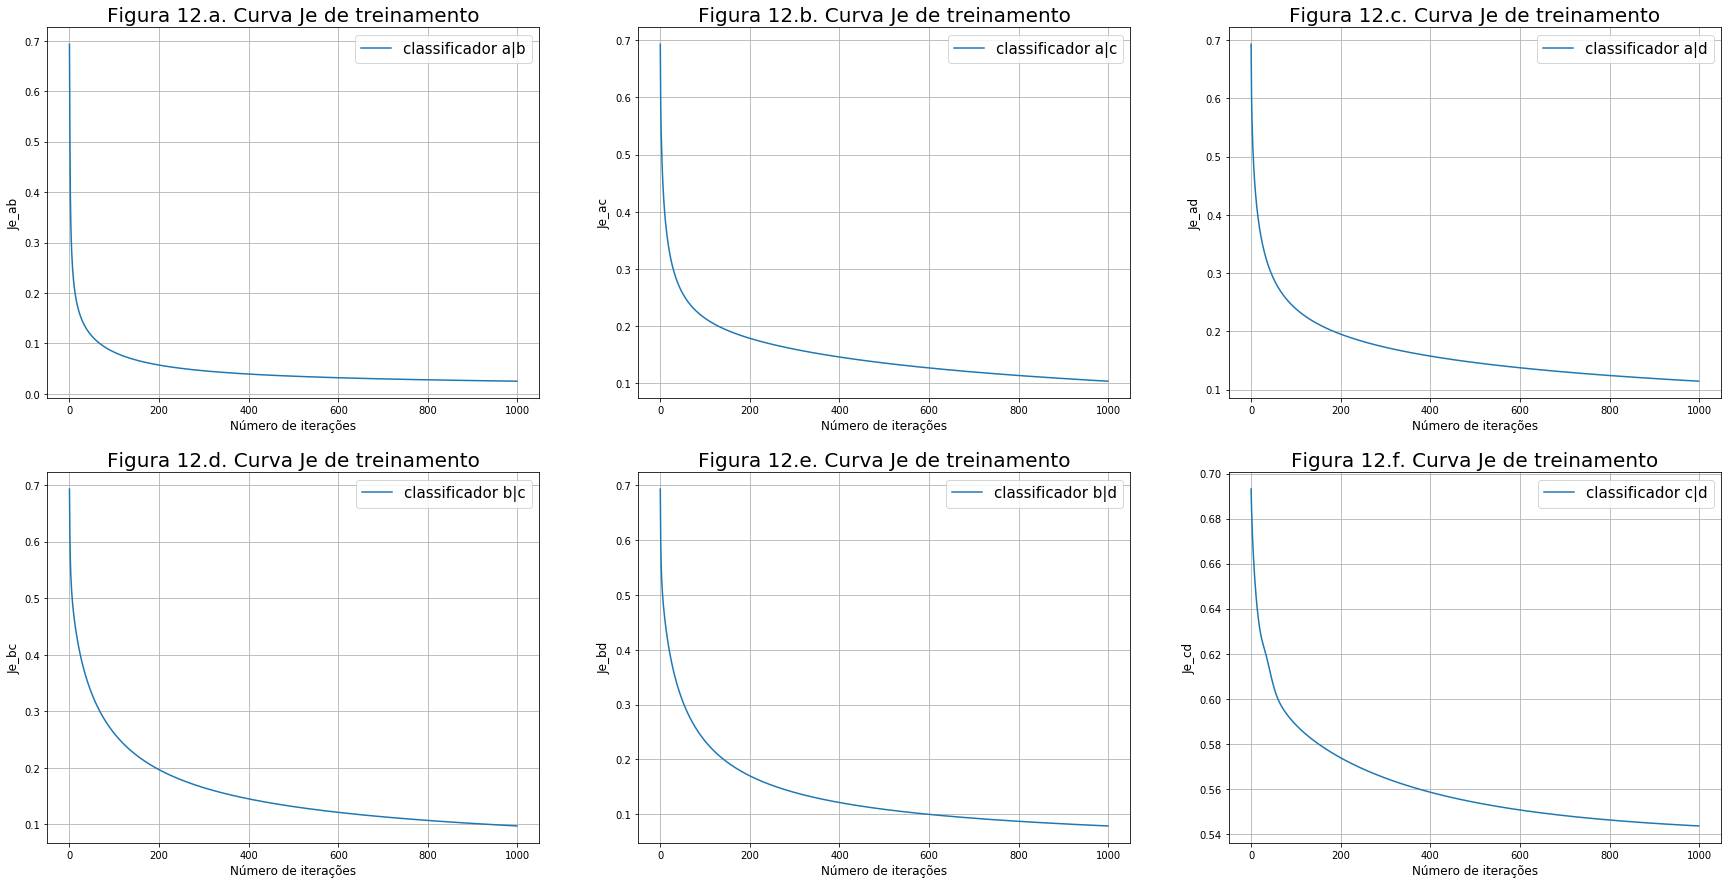

Erros Je de treinamento de cada classificador
Je_a|b = 0.025140139560416663
Je_a|c = 0.10370193782029621
Je_a|d = 0.11438929682989232
Je_b|c = 0.09705065792210561
Je_b|d = 0.07876497806079165
Je_c|d = 0.5435078332582914


In [27]:
plt.figure(12, figsize=(30,15))

plt.subplot(2,3,1)
plt.plot(np.arange(it), Je_tr_ab, label="classificador a|b")
plt.title("Figura 12.a. Curva Je de treinamento", fontsize=20)
plt.legend(fontsize=15)
plt.xlabel("Número de iterações", fontsize=12)
plt.ylabel("Je_ab", fontsize=12)
plt.grid()

plt.subplot(2,3,2)
plt.plot(np.arange(it), Je_tr_ac, label="classificador a|c")
plt.title("Figura 12.b. Curva Je de treinamento", fontsize=20)
plt.legend(fontsize=15)
plt.xlabel("Número de iterações", fontsize=12)
plt.ylabel("Je_ac", fontsize=12)
plt.grid()

plt.subplot(2,3,3)
plt.plot(np.arange(it), Je_tr_ad, label="classificador a|d")
plt.title("Figura 12.c. Curva Je de treinamento", fontsize=20)
plt.legend(fontsize=15)
plt.xlabel("Número de iterações", fontsize=12)
plt.ylabel("Je_ad", fontsize=12)
plt.grid()

plt.subplot(2,3,4)
plt.plot(np.arange(it), Je_tr_bc, label="classificador b|c")
plt.title("Figura 12.d. Curva Je de treinamento", fontsize=20)
plt.legend(fontsize=15)
plt.xlabel("Número de iterações", fontsize=12)
plt.ylabel("Je_bc", fontsize=12)
plt.grid()

plt.subplot(2,3,5)
plt.plot(np.arange(it), Je_tr_bd, label="classificador b|d")
plt.title("Figura 12.e. Curva Je de treinamento", fontsize=20)
plt.legend(fontsize=15)
plt.xlabel("Número de iterações", fontsize=12)
plt.ylabel("Je_bd", fontsize=12)
plt.grid()

plt.subplot(2,3,6)
plt.plot(np.arange(it), Je_tr_cd, label="classificador c|d")
plt.title("Figura 12.f. Curva Je de treinamento", fontsize=20)
plt.legend(fontsize=15)
plt.xlabel("Número de iterações", fontsize=12)
plt.ylabel("Je_cd", fontsize=12)
plt.grid()
plt.show()

print("Erros Je de treinamento de cada classificador")
print("Je_a|b = " + str(Je_tr_ab[-1].squeeze()))
print("Je_a|c = " + str(Je_tr_ac[-1].squeeze()))
print("Je_a|d = " + str(Je_tr_ad[-1].squeeze()))
print("Je_b|c = " + str(Je_tr_bc[-1].squeeze()))
print("Je_b|d = " + str(Je_tr_bd[-1].squeeze()))
print("Je_c|d = " + str(Je_tr_cd[-1].squeeze()))

**Thresholds**

Achamos o threshold adequado para cada classificador, por separado, que minimize os erros

In [28]:
thresholdr = np.arange(0, 1.01, 0.001)

#ab
pyCaxCa_ab = sigmoid(np.dot(Phik_tr[index_tr_a,:], list_params_ab[-1]))
pyCaxCb_ab = sigmoid(np.dot(Phik_tr[index_tr_b,:], list_params_ab[-1]))
recall_ab, fpr_ab,_ , F1ab = get_metrics(thresholdr, pyCaxCa_ab, pyCaxCb_ab)
best_in_ab = np.argmin(np.linalg.norm((fpr_ab, recall_ab-1), axis=0))   #index do melhor threshold entre a e b
#best_in_ab = np.argmax(F1ab)   #index do melhor threshold entre a e b
#ac
pyCaxCa_ac = sigmoid(np.dot(Phik_tr[index_tr_a,:], list_params_ac[-1]))
pyCaxCc_ac = sigmoid(np.dot(Phik_tr[index_tr_c,:], list_params_ac[-1]))
recall_ac, fpr_ac,_ , F1ac = get_metrics(thresholdr, pyCaxCa_ac, pyCaxCc_ac)
best_in_ac = np.argmin(np.linalg.norm((fpr_ac, recall_ac-1), axis=0))   #index do melhor threshold entre a e c
#best_in_ac = np.argmax(F1ac)   #index do melhor threshold entre a e b
#ad
pyCaxCa_ad = sigmoid(np.dot(Phik_tr[index_tr_a,:], list_params_ad[-1]))
pyCaxCd_ad = sigmoid(np.dot(Phik_tr[index_tr_d,:], list_params_ad[-1]))
recall_ad, fpr_ad,_ , F1ad = get_metrics(thresholdr, pyCaxCa_ad, pyCaxCd_ad)
best_in_ad = np.argmin(np.linalg.norm((fpr_ad, recall_ad-1), axis=0))   #index do melhor threshold entre a e d
#best_in_ad = np.argmax(F1ad)   #index do melhor threshold entre a e b
#bc
pyCbxCb_bc = sigmoid(np.dot(Phik_tr[index_tr_b,:], list_params_bc[-1]))
pyCbxCc_bc = sigmoid(np.dot(Phik_tr[index_tr_c,:], list_params_bc[-1]))
recall_bc, fpr_bc,_ , F1bc = get_metrics(thresholdr, pyCbxCb_bc, pyCbxCc_bc)
best_in_bc = np.argmin(np.linalg.norm((fpr_bc, recall_bc-1), axis=0))   #index do melhor threshold entre b e c
#best_in_bc = np.argmax(F1bc)   #index do melhor threshold entre a e b
#bd
pyCbxCb_bd = sigmoid(np.dot(Phik_tr[index_tr_b,:], list_params_bd[-1]))
pyCbxCd_bd = sigmoid(np.dot(Phik_tr[index_tr_d,:], list_params_bd[-1]))
recall_bd, fpr_bd,_ , F1bd = get_metrics(thresholdr, pyCbxCb_bd, pyCbxCd_bd)
best_in_bd = np.argmin(np.linalg.norm((fpr_bd, recall_bd-1), axis=0))   #index do melhor threshold entre b e d
#best_in_bd = np.argmax(F1bd)   #index do melhor threshold entre a e b
#cd
pyCcxCc_cd = sigmoid(np.dot(Phik_tr[index_tr_c,:], list_params_cd[-1]))
pyCcxCd_cd = sigmoid(np.dot(Phik_tr[index_tr_d,:], list_params_cd[-1]))
recall_cd, fpr_cd,_ , F1cd = get_metrics(thresholdr, pyCcxCc_cd, pyCcxCd_cd)
best_in_cd = np.argmin(np.linalg.norm((fpr_cd, recall_cd-1), axis=0))    #index do melhor threshold entre c e d
#best_in_cd = np.argmax(F1cd)   #index do melhor threshold entre a e b

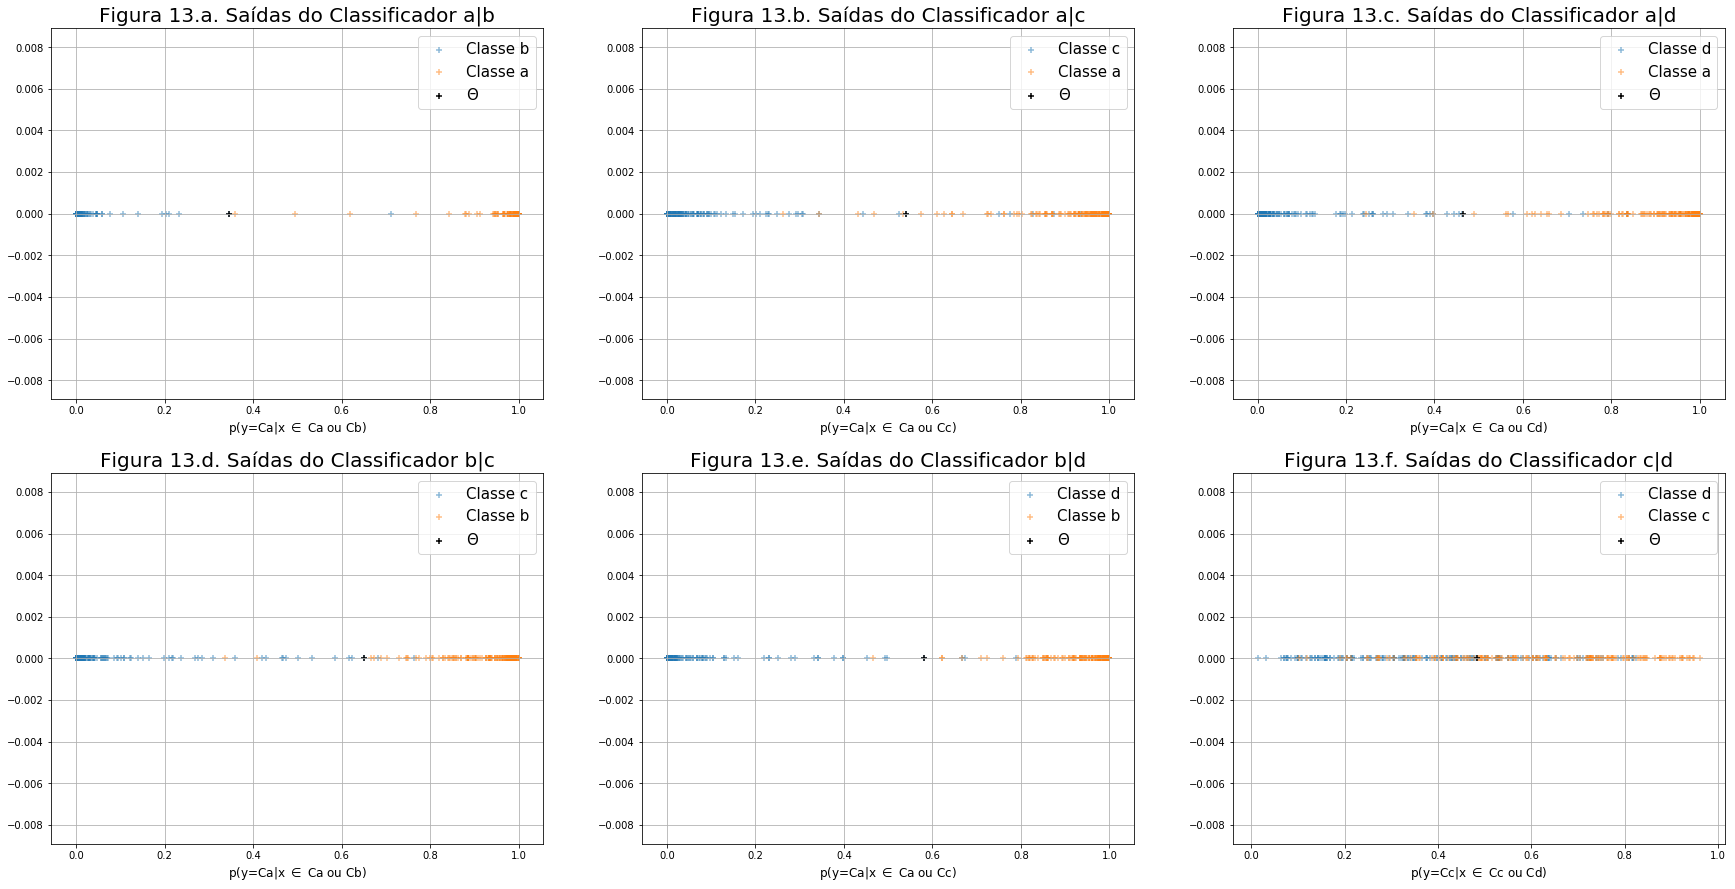

Threshold selecionado para o classificador de a e b : Theta = 0.34600000000000003
Threshold selecionado para o classificador de a e c : Theta = 0.542
Threshold selecionado para o classificador de a e d : Theta = 0.464
Threshold selecionado para o classificador de b e c : Theta = 0.651
Threshold selecionado para o classificador de b e d : Theta = 0.581
Threshold selecionado para o classificador de c e d : Theta = 0.483


In [29]:
plt.figure(13, figsize=(30,15))
plt.subplot(2, 3, 1)
plt.scatter(pyCaxCb_ab, 0*pyCaxCb_ab, marker="+", alpha=0.5, label="Classe b")   #projeções
plt.scatter(pyCaxCa_ab, 0*pyCaxCa_ab, marker="+", alpha=0.5, label="Classe a")
plt.scatter(thresholdr[best_in_ab], 0, c="k", marker="+", label = "$\Theta$")
plt.title("Figura 13.a. Saídas do Classificador a|b", fontsize=20)
plt.legend(fontsize=15)
plt.xlabel("p(y=Ca|x $\in$ Ca ou Cb)", fontsize=12)
plt.grid()

plt.subplot(2, 3, 2)
plt.scatter(pyCaxCc_ac, 0*pyCaxCc_ac, marker="+", alpha=0.5, label="Classe c")   #projeções
plt.scatter(pyCaxCa_ac, 0*pyCaxCa_ac, marker="+", alpha=0.5, label="Classe a")
plt.scatter(thresholdr[best_in_ac], 0, c="k", marker="+", label = "$\Theta$")
plt.title("Figura 13.b. Saídas do Classificador a|c", fontsize=20)
plt.legend(fontsize=15)
plt.xlabel("p(y=Ca|x $\in$ Ca ou Cc)", fontsize=12)
plt.grid()

plt.subplot(2, 3, 3)
plt.scatter(pyCaxCd_ad, 0*pyCaxCd_ad, marker="+", alpha=0.5, label="Classe d")   #projeções
plt.scatter(pyCaxCa_ad, 0*pyCaxCa_ad, marker="+", alpha=0.5, label="Classe a")
plt.scatter(thresholdr[best_in_ad], 0, c="k", marker="+", label = "$\Theta$")
plt.title("Figura 13.c. Saídas do Classificador a|d", fontsize=20)
plt.legend(fontsize=15)
plt.xlabel("p(y=Ca|x $\in$ Ca ou Cd)", fontsize=12)
plt.grid()

plt.subplot(2, 3, 4)
plt.scatter(pyCbxCc_bc, 0*pyCbxCc_bc, marker="+", alpha=0.5, label="Classe c")   #projeções
plt.scatter(pyCbxCb_bc, 0*pyCbxCb_bc, marker="+", alpha=0.5, label="Classe b")
plt.scatter(thresholdr[best_in_bc], 0, c="k", marker="+", label = "$\Theta$")
plt.title("Figura 13.d. Saídas do Classificador b|c", fontsize=20)
plt.legend(fontsize=15)
plt.xlabel("p(y=Ca|x $\in$ Ca ou Cb)", fontsize=12)
plt.grid()

plt.subplot(2, 3, 5)
plt.scatter(pyCbxCd_bd, 0*pyCbxCd_bd, marker="+", alpha=0.5, label="Classe d")   #projeções
plt.scatter(pyCbxCb_bd, 0*pyCbxCb_bd, marker="+", alpha=0.5, label="Classe b")
plt.scatter(thresholdr[best_in_bd], 0, c="k", marker="+", label = "$\Theta$")
plt.title("Figura 13.e. Saídas do Classificador b|d", fontsize=20)
plt.legend(fontsize=15)
plt.xlabel("p(y=Ca|x $\in$ Ca ou Cc)", fontsize=12)
plt.grid()

plt.subplot(2, 3, 6)
plt.scatter(pyCcxCd_cd, 0*pyCcxCd_cd, marker="+", alpha=0.5, label="Classe d")   #projeções
plt.scatter(pyCcxCc_cd, 0*pyCcxCc_cd, marker="+", alpha=0.5, label="Classe c")
plt.scatter(thresholdr[best_in_cd], 0, c="k", marker="+", label = "$\Theta$")
plt.title("Figura 13.f. Saídas do Classificador c|d", fontsize=20)
plt.legend(fontsize=15)
plt.xlabel("p(y=Cc|x $\in$ Cc ou Cd)", fontsize=12)
plt.grid()

plt.show()

print("Threshold selecionado para o classificador de a e b : Theta = " + str(thresholdr[best_in_ab]))
print("Threshold selecionado para o classificador de a e c : Theta = " + str(thresholdr[best_in_ac]))
print("Threshold selecionado para o classificador de a e d : Theta = " + str(thresholdr[best_in_ad]))
print("Threshold selecionado para o classificador de b e c : Theta = " + str(thresholdr[best_in_bc]))
print("Threshold selecionado para o classificador de b e d : Theta = " + str(thresholdr[best_in_bd]))
print("Threshold selecionado para o classificador de c e d : Theta = " + str(thresholdr[best_in_cd]))

Nas Fig.12 e Fig.13 notamos que as saídas dos classificadores com menor Je estam mais separadas e pertos dos extremos 0 e 1, como deveria ser. O pior caso é do classificador das classes c e d (Fig.12.f e Fig.13.f) porque seu Je é maior e as saídas das classes que deve separar estam misturadas.

**Etapa de decisão e desambiguação**

Para os dados de treinamento

In [30]:
g1 = sigmoid(np.dot(Phik_tr, list_params_ab[-1]))
g2 = sigmoid(np.dot(Phik_tr, list_params_ac[-1]))
g3 = sigmoid(np.dot(Phik_tr, list_params_ad[-1]))
g4 = sigmoid(np.dot(Phik_tr, list_params_bc[-1]))
g5 = sigmoid(np.dot(Phik_tr, list_params_bd[-1]))
g6 = sigmoid(np.dot(Phik_tr, list_params_cd[-1]))


Yk_tr_decision = np.zeros((Yk_tr.shape[0])).astype(str).reshape((-1,1))

for i in range(Phik_tr.shape[0]):

    if np.all([g1 > thresholdr[best_in_ab], g2 > thresholdr[best_in_ac], g3 > thresholdr[best_in_ad]], axis=0)[i]:
        Yk_tr_decision[i] = "bus"
    elif np.all([g1 < thresholdr[best_in_ab], g4 > thresholdr[best_in_bc], g5 > thresholdr[best_in_bd]], axis=0)[i]:
        Yk_tr_decision[i] = "van"
    elif np.all([g2 < thresholdr[best_in_ac], g4 < thresholdr[best_in_bc], g6 > thresholdr[best_in_cd]], axis=0)[i]:
        Yk_tr_decision[i] = "opel"
    elif np.all([g3 < thresholdr[best_in_ad], g5 < thresholdr[best_in_bd], g6 < thresholdr[best_in_cd]], axis=0)[i]:
        Yk_tr_decision[i] = "saab"
    else: #zona de ambiguidade
        
        p_a = (g1[i] + g2[i] + g3[i])/3
        p_b = (1 - g1[i] + g4[i] + g5[i])/3
        p_c = (1 - g2[i] + 1 - g4[i] + g6[i])/3
        p_d = (1 - g3[i] + 1 - g5[i] + 1 - g6[i])/3
        #mecanismo de desambiguação: selecionamos a classe que maximiza a probabilidade média      
        if np.argmax([p_a, p_b, p_c, p_d])==0:   Yk_tr_decision[i] = "bus"
        elif np.argmax([p_a, p_b, p_c, p_d])==1: Yk_tr_decision[i] = "van"
        elif np.argmax([p_a, p_b, p_c, p_d])==2: Yk_tr_decision[i] = "opel"
        elif np.argmax([p_a, p_b, p_c, p_d])==3: Yk_tr_decision[i] = "saab"   

Para os dados de teste

In [31]:
g1 = sigmoid(np.dot(Phik_test, list_params_ab[-1]))
g2 = sigmoid(np.dot(Phik_test, list_params_ac[-1]))
g3 = sigmoid(np.dot(Phik_test, list_params_ad[-1]))
g4 = sigmoid(np.dot(Phik_test, list_params_bc[-1]))
g5 = sigmoid(np.dot(Phik_test, list_params_bd[-1]))
g6 = sigmoid(np.dot(Phik_test, list_params_cd[-1]))


Yk_test_decision = np.zeros((Yk_test.shape[0])).astype(str).reshape((-1,1))

for i in range(Phik_test.shape[0]):

    if np.all([g1 > thresholdr[best_in_ab], g2 > thresholdr[best_in_ac], g3 > thresholdr[best_in_ad]], axis=0)[i]:
        Yk_test_decision[i] = "bus"
    elif np.all([g1 < thresholdr[best_in_ab], g4 > thresholdr[best_in_bc], g5 > thresholdr[best_in_bd]], axis=0)[i]:
        Yk_test_decision[i] = "van"
    elif np.all([g2 < thresholdr[best_in_ac], g4 < thresholdr[best_in_bc], g6 > thresholdr[best_in_cd]], axis=0)[i]:
        Yk_test_decision[i] = "opel"
    elif np.all([g3 < thresholdr[best_in_ad], g5 < thresholdr[best_in_bd], g6 < thresholdr[best_in_cd]], axis=0)[i]:
        Yk_test_decision[i] = "saab"
    else: #zona de ambiguidade
        
        p_a = (g1[i] + g2[i] + g3[i])/3
        p_b = (1 - g1[i] + g4[i] + g5[i])/3
        p_c = (1 - g2[i] + 1 - g4[i] + g6[i])/3
        p_d = (1 - g3[i] + 1 - g5[i] + 1 - g6[i])/3
        #mecanismo de desambiguação: selecionamos a classe que maximiza a probabilidade média      
        if np.argmax([p_a, p_b, p_c, p_d])==0:   Yk_test_decision[i] = "bus"
        elif np.argmax([p_a, p_b, p_c, p_d])==1: Yk_test_decision[i] = "van"
        elif np.argmax([p_a, p_b, p_c, p_d])==2: Yk_test_decision[i] = "opel"
        elif np.argmax([p_a, p_b, p_c, p_d])==3: Yk_test_decision[i] = "saab"   

**Matriz de confusão total e métricas de desempenho global**

**Matriz de Confusão**

Em alguns cenários reais é mais importante minimizar o número de erros de classificação de elementos da classe negativa, ou falsos positivos (FP). Em outros, é mais importante minimizar os erros de classificação de elementos da classe positiva, ou falsos negativos (FN).

Por exemplo, dado um cenário que um classificador é modelado para detectar se o paciênte tem câncer (classe positiva) ou não (classe negativa), um falso-negativo diz respeito à um paciente que foi classificado como saudável, porém tem câncer. A ideia neste cenário é minimizar os falsos-negativos, estabelecendo um valor de threshold adequado que os minimize. Consequentemente, ao diminuir a quantidade de falsos-negativos alterando o valor do threshold, podemos notar que a taxa de falsos-positivos aumenta de forma inversa.

A prioridade por diminuir falsos-positivos ou falsos-positivos depende do cenário em que o modelo está sendo construído.

A matriz de confusão é uma ferramenta para visualizar aqueles erros usando uma caixa de entrada dupla, tal que as colunas representam as classes verdadeiras e as linhas as representam as classes estimadas.

**Métricas de desempenho global para classificação multiclasse**

Usadas quando temos mais de duas classes. Neste caso, selecionamos uma classe $C_i$ como a classe positiva e o resto como a classe negativa, para $C_i$, tal que agora é possível calcular as mesmas métricas que no caso de duas classes, mas, mudando um pouco as definições.


\begin{align}
Average\,Accuracy =& \frac{\sum_{i=1}^{k}\frac{TP_i+TN_i}{TP_i+FN_i+FP_i+TN_i}}{k}\\
\\
Error\,Rate =& \frac{ \sum_{i=1}^{k} \frac{FP_i+FN_i}{TP_i+FN_i+FP_i+TN_i}}{k}\\
\\
Precision_M =& \frac{\sum_{i=1}^{k}\frac{TP_i}{TP_i+FP_i}}{k}\\
\\
Recall_M =& \frac{\sum_{i=1}^{k}\frac{TP_i}{TP_i+FN_i}}{k}\\
\\
FScore_M =& \frac{(\beta^2+1)Precision_MRecall_M}{\beta^2Precision_M+Recall_M}
\end{align}




Definimos uma função para criar uma matriz de confusão

In [32]:
def plot_confusion_matrix(cm, labels, num_fig, text):
    
    plt.figure(num_fig, figsize=(10,5))
    df = pd.DataFrame(cm, labels, labels)
    sns.heatmap(df, annot=True)
    plt.title("Figura {}".format(num_fig) + ". {}".format(text), fontsize=20)
    plt.xlabel('Classe estimada', fontsize=12)
    plt.ylabel('Classe verdadeira', fontsize=12)
    plt.yticks(rotation="horizontal")
    plt.show()

Definimos uma função para contar o número de  verdadeiros e falsos positivos e negativos para "k" classes

In [33]:
def true_false_values(decisions, index, labels):
    values=np.zeros((1, len(labels)))
    for i in range(len(labels)):
        values[:, i] = len(np.argwhere(decisions[index]==labels[i])[:,0])
    return values

Carregamos os valores em uma matriz de confusão 4x4

In [34]:
cm_tr   = np.zeros((4,4))
cm_test = np.zeros((4,4))

cm_tr[0,:] = true_false_values(Yk_tr_decision, index_tr_a, ["bus", "van", "opel", "saab"]).squeeze()
cm_tr[1,:] = true_false_values(Yk_tr_decision, index_tr_b, ["bus", "van", "opel", "saab"]).squeeze()
cm_tr[2,:] = true_false_values(Yk_tr_decision, index_tr_c, ["bus", "van", "opel", "saab"]).squeeze()
cm_tr[3,:] = true_false_values(Yk_tr_decision, index_tr_d, ["bus", "van", "opel", "saab"]).squeeze()

cm_test[0,:] = true_false_values(Yk_test_decision, index_test_a, ["bus", "van", "opel", "saab"]).squeeze()
cm_test[1,:] = true_false_values(Yk_test_decision, index_test_b, ["bus", "van", "opel", "saab"]).squeeze()
cm_test[2,:] = true_false_values(Yk_test_decision, index_test_c, ["bus", "van", "opel", "saab"]).squeeze()
cm_test[3,:] = true_false_values(Yk_test_decision, index_test_d, ["bus", "van", "opel", "saab"]).squeeze()

Implementamos as métricas definidas no paper "Information Processing and Management" de Marina Sokolova e Guy Lapalme (Tabula 3 do paper):

In [35]:
def multiclass_measures(cm, beta):
    average_accuracy = 0
    error_rate  = 0
    precision_M = 0
    recall_M    = 0

    for i in range(cm.shape[0]):
        average_accuracy += (cm[i,i] + np.sum(np.delete(np.delete(cm, i, axis=0), i, axis=1)))/np.sum(cm)/cm.shape[0]
        error_rate  += (np.sum(cm[:,i]) + np.sum(cm[i,:]) - 2*cm[i,i])/np.sum(cm)/cm.shape[0]
        precision_M += cm[i,i]/np.sum(cm[:,i])/cm.shape[0]
        recall_M    += cm[i,i]/np.sum(cm[i,:])/cm.shape[0]
    
    Fscore_M     = (beta**2+1)*precision_M*recall_M/(precision_M*beta**2+recall_M)         
    precision_mu = np.trace(cm)/np.sum(cm)
    recall_mu    = np.trace(cm)/np.sum(cm)
    Fscore_mu    = (beta**2+1)*precision_mu*recall_mu/((beta**2)*precision_mu+recall_mu)
    
        
    return average_accuracy, error_rate, precision_M, recall_M, Fscore_M, precision_mu, recall_mu, Fscore_mu

Calculamos as métricas globais:

In [36]:
avg_acc_tr, error_rate_tr, precision_M_tr, recall_M_tr, Fscore_M_tr,_,_,_ = multiclass_measures(cm_tr, 1)
avg_acc_test, error_rate_test, precision_M_test, recall_M_test, Fscore_M_test,_,_,_= multiclass_measures(cm_test, 1)

Mostramos a matriz de confusão e as métricas de desempenho para os dados de treinamento e teste

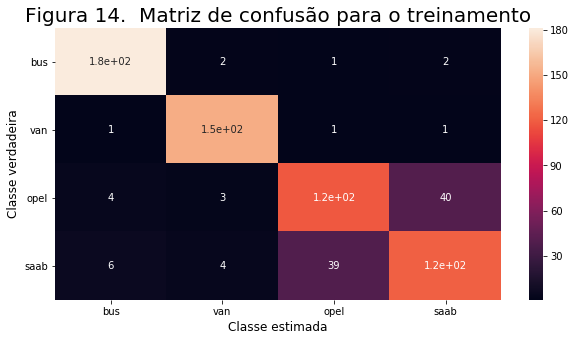

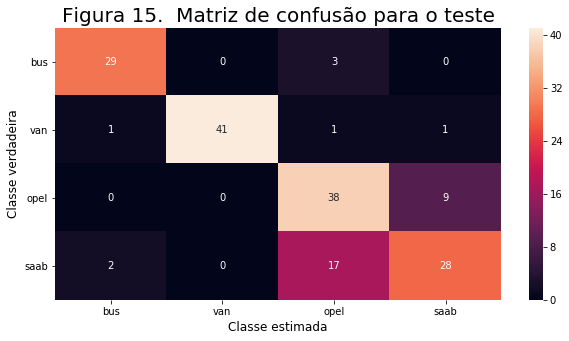

Threshold = [0.346, 0.542, 0.464, 0.651, 0.581, 0.483]


Métricas de desempenho global


Para os dados de treinamento:
Average accuracy = 0.923076923076923
Error rate = 0.07692307692307693
Precision_M = 0.8416877387609939
Recall_M = 0.8451699154735208
F1_M = 0.8434252329922205


Para os dados de teste:
Average accuracy = 0.9
Error rate = 0.1
Precision_M = 0.8217899754683319
Recall_M = 0.8105808752417795
F1_M = 0.8161469402498376


In [37]:
plot_confusion_matrix(cm_tr, ["bus", "van", "opel", "saab"], 14, " Matriz de confusão para o treinamento")
plot_confusion_matrix(cm_test, ["bus", "van", "opel", "saab"], 15, " Matriz de confusão para o teste")
print("Threshold = " + str([np.round(thresholdr[best_in_ab], 3), thresholdr[best_in_ac], thresholdr[best_in_ad],\
              thresholdr[best_in_bc], thresholdr[best_in_bd], thresholdr[best_in_cd]]))
print("\n")
print("Métricas de desempenho global")
print("\n")
print("Para os dados de treinamento:")
print("Average accuracy = " +str(avg_acc_tr))
print("Error rate = " +str(error_rate_tr))
print("Precision_M = " +str(precision_M_tr))
print("Recall_M = " +str(recall_M_tr))
print("F1_M = " +str(Fscore_M_tr))
print("\n")
print("Para os dados de teste:")
print("Average accuracy = " +str(avg_acc_test))
print("Error rate = " +str(error_rate_test))
print("Precision_M = " +str(precision_M_test))
print("Recall_M = " +str(recall_M_test))
print("F1_M = " +str(Fscore_M_test))

Nas Fig. 14 e 15 notamos que, em geral, o classificador multiclasse, construido em base a 6 classificadores binarios do tipo one-vs-one, apresenta boas métricas globais de desempenho. Isso porque as primeiras classes apresentam poucos elementos mal classificados e, também, pela natureza do método one-vs-one em que o area de ambiguedade é menor que no caso one-vs-all.

O maior erro ocurre para as classes c e d, ainda depois de treinar o classificador e selecionar um threshold adequado para reducir os erros de classificación. Como já notamos nas Fig.12.f e Fig.13.f, as dois classes parecem estar misturadas e não será possível separár as com uma fronteira de decisão linear tal que o número de amostras mal classificadas seja muito menor. Problema de bias. Por isso a maioria de elementos mal classificados estám em essas duas classes.

Para os dados de treinamento e teste as métricas não mudam muito.



### b) K-Nearest Neighboors

Para realizar a classificação utilizando o K-Nearest Neighboors, é necessário uma medida de distância para medir a similiaridade entre um novo padrão e um padrão já conhecido, apresentado no processo de treinamento.

Para isto, abordaremos métricas de distância derivadas da fórmula a seguir:

$$ d(x;y) = \Big(\sum_{i=1}^K | x_i - y_i |^p\Big)^{\frac{1}{p}} $$

1. Para $p = 1$, temos a Distância de Manhattan:

$ d(x;y) = \sum_{i=1}^K | x_i - y_i | $


2. Para $p = 2$, temos a Distância Euclidiana:

$ d(x;y) = \sqrt{\sum_{i=1}^K | x_i - y_i |^2} $


A partir da distância de um novo padrão até um padrão já conhecido e rotulado, deve-se ordenar da menor distância até a maior distância.

O voto majoritário das classes cujas menores K distâncias do novo padrão até um padrão conhecido deve ser computado para a classificação.

O voto majoritário simplismente computa a classe mais frequente referente as distâncias mais próximas e atribui ao novo padrão.

É comum escolher o número ímpar de K vizinhos para não ocorrer empate no voto majoritário.

Carregamos os dados

In [38]:
df = pd.read_csv('data/dataset_vehicle.csv')
X = df.values[:,:-1]
y = df['Class'].values
y_reshaped = y.reshape(-1,1)

In [40]:
def get_distance(p, x, y):
    distance = 0
    for i in range(len(x)):
        distance += pow(abs(x[i] - y[i]) , p)
    
    return pow(distance, 1/p)

In [41]:
def get_k_nearest_neighboors(K, p, pattern, X_train, y_train):
    
    # Distances é um vetor de tuplas, onde:
    #(Distancia de um novo padrão até um padrão conhecido , Classe do padrão conhecido)
    distances = []
    
    for i, entry in enumerate(X_train):
        _distance = distance.minkowski(pattern, entry, p)
        distances.append((_distance, y_train[i]))

    distances.sort()
    return distances[:K]

In [42]:
def get_classification(distance_matrix):
    """
    Obtém a classe mais votada através do voto majoritário
    """
    classes, votes = np.unique(np.array(distance_matrix)[:,1], return_counts=True)
    return classes[np.argmax(votes)]

Primeiramente, os dados foram carregados e embaralhados. Assim como no caso de regressão logística one-vs-one, aplicamos a técnica Holdout para separação dos conjuntos de treino e teste, sendo respectivamente, 80% e 20%.

Em seguida, a técnica K-Fold foi aplicada para escolha do hiper-parâmetro K (número de vizinhos) mais adequado, separando o conjunto de treino de entrada em 4 pastas, sendo 25% deste conjunto para validação (a validação, então, é um 20% do total e os dados de só treinamento um 60% do total). Os valores de K testados foram: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

Vale destacar também que, para separação dos conjuntos de treino e validação dentro do K-Fold, os dados foram embaralhados novamente. Para cada hiper-parâmetro K, as acurácias foram computadas através da média de 5 execuções.


In [43]:
def get_kfold_pred(K, distance, folds_number, X, y):
    fold_size = int(len(X)/folds_number)
    X_train, y_train = None, None
    X_test, y_test = None, None
    predictions_all_folds = []

    np.random.seed()
    index = np.random.permutation(X.shape[0])
    X = X[index, :]
    y = y[index, :]
    
    
    for test_idx in range(folds_number):
        predictions = []
        X_train, y_train = None, None
        X_test, y_test = None, None

        #print('Testando no Fold {}'.format(test_idx + 1))
        X_test = X[(test_idx * fold_size) : (test_idx + 1) * fold_size]
        y_test = y[(test_idx * fold_size) : (test_idx + 1) * fold_size]

        for train_idx in range(folds_number):

            if train_idx == test_idx:
                continue

            if X_train is None:
                X_train = X[train_idx * fold_size : (train_idx + 1) * fold_size]
                y_train = y[train_idx * fold_size : (train_idx + 1) * fold_size]

            else:
                np.concatenate((X[train_idx * fold_size : (train_idx + 1) * fold_size], X_train))
                np.concatenate((y[train_idx * fold_size : (train_idx + 1) * fold_size], y_train))


        for i, test_entry in enumerate(X_test):
            nearest_neighboors = get_k_nearest_neighboors(K, distance, test_entry, X_train, y_train )
            label = get_classification(nearest_neighboors)
            predictions.append((label, y_test[i]))

        predictions_all_folds.append(predictions)
    
    return predictions_all_folds

In [44]:
def generate_confusion_matrix(prediction_folds, numpy=False):
    cm = np.zeros((4,4))
    position_dict = {
        'bus': 0,
        'van': 1,
        'opel': 2,
        'saab': 3
    }
    
    if numpy:
        for prediction in prediction_folds:
            predicted_label = prediction[0][0]
            real_label = prediction[1][0]
            cm[position_dict[real_label]][position_dict[predicted_label]] += 1

    else:
        
        for prediction_fold in prediction_folds:
            for prediction in prediction_fold:
                predicted_label = prediction[0]
                real_label = prediction[1]
                cm[position_dict[real_label[0]]][position_dict[predicted_label[0]]] += 1
    
    return cm

In [45]:
Ks = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
all_cm_hist = []
all_acc_hist = []
repeats = 5
for distance_param in [1, 2]:
    acc_hist, cm_hist = [], []
    
    for K in Ks:
        sum_acc = 0
        
        for iteration in range(repeats):
            predictions_all_folds = get_kfold_pred(K=K, distance=distance_param, folds_number=4, X=Ck_tr, y=Yk_tr)
            cm = generate_confusion_matrix(predictions_all_folds)
            acc_knn, _, _, _, _, _, _, _ = multiclass_measures(cm, 1)
            sum_acc += acc_knn
        
        avg_acc = sum_acc/repeats
        
        all_cm_hist.append(cm)
        all_acc_hist.append(avg_acc)
        
        avg_acc = 0

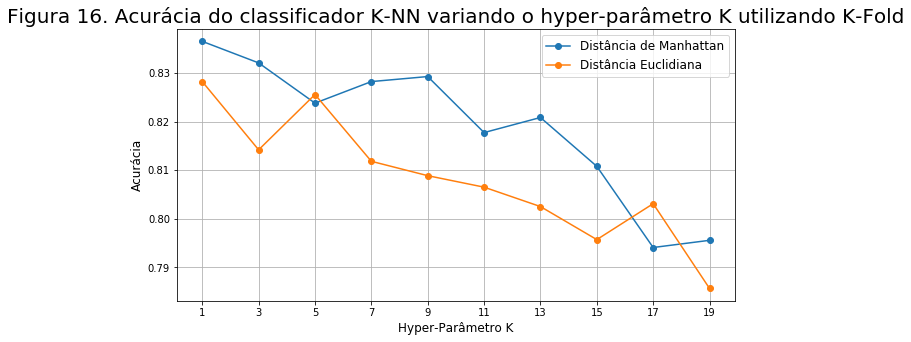

In [46]:
plt.figure(16, figsize=(10,5))
plt.title('Figura 16. Acurácia do classificador K-NN variando o hyper-parâmetro K utilizando K-Fold', fontsize=20)
plt.ylabel(u'Acurácia', fontsize=12)
plt.xlabel(u'Hyper-Parâmetro K', fontsize=12)
plt.grid()
plt.plot(Ks, all_acc_hist[:10], marker='o', label="Distância de Manhattan")
plt.plot(Ks, all_acc_hist[10:], marker='o', label="Distância Euclidiana")
plt.legend(fontsize=12)
plt.xticks(Ks, Ks)
plt.show()

Podemos notar na Figura 16 que, quando o número de K aumenta, a acurácia média do classificador cai para ambas métricas de distância.

Importantemente, a diferença de acurácia média, variando o K é baixa, no intervalo de K = 1 a K = 19 a variação de acurácia é apenas 0.05.

Uma hipótese é que as classes opel e saab são muito dispersas no espaço, além de estarem mescladas. Devido à isso, aumentar o número K leva a incluir padrões cujo rótulo são de outras classes, porque todos os mais próximos estão muito longe. 

Por outro lado, um K muito pequeno, pode ser influenciado por ruídos ou outliers, fazendo o classificador inferir uma classe errada.

In [39]:
X_train, y_train, X_test, y_test = holdout(X, y_reshaped, 0.8)

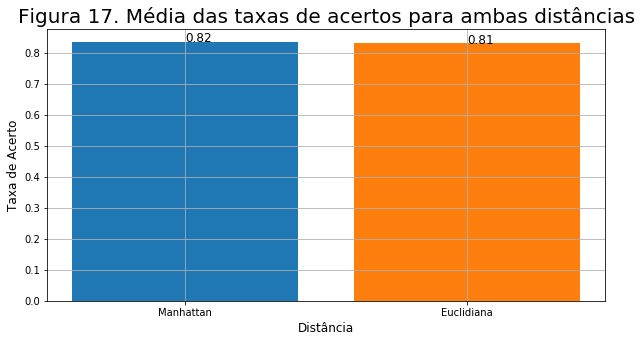

In [47]:
plt.figure(17, figsize=(10,5))
plt.title('Figura 17. Média das taxas de acertos para ambas distâncias', fontsize=20)
plt.ylabel('Taxa de Acerto', fontsize=12)
plt.xlabel('Distância', fontsize=12)
plt.grid()
plt.bar(['Manhattan'], np.mean(all_acc_hist[0]))
plt.bar(['Euclidiana'], np.mean(all_acc_hist[1]))
plt.text(0, np.mean(all_acc_hist[0]), round(np.mean(all_acc_hist[:10]), 2), fontsize=12)
plt.text(1, np.mean(all_acc_hist[1]), round(np.mean(all_acc_hist[10:]), 2), fontsize=12)
plt.show()

A distância de Manhattan e a distância Euclidiana resultam em acurácias médias muito semelhantes entre si.

As matrizes de confusão a seguir foram geradas utilizando a distância de Manhattan e somando cada matriz de confusão de cada pasta de validação. A média das matrizes de confusão não foram computadas para evitar números decimais.

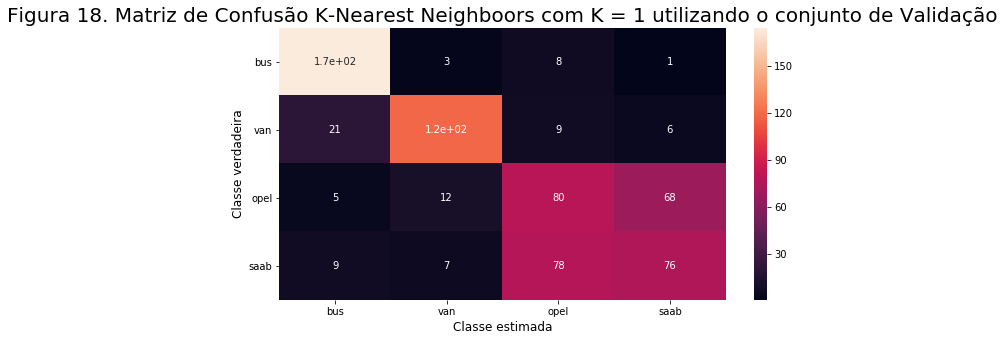

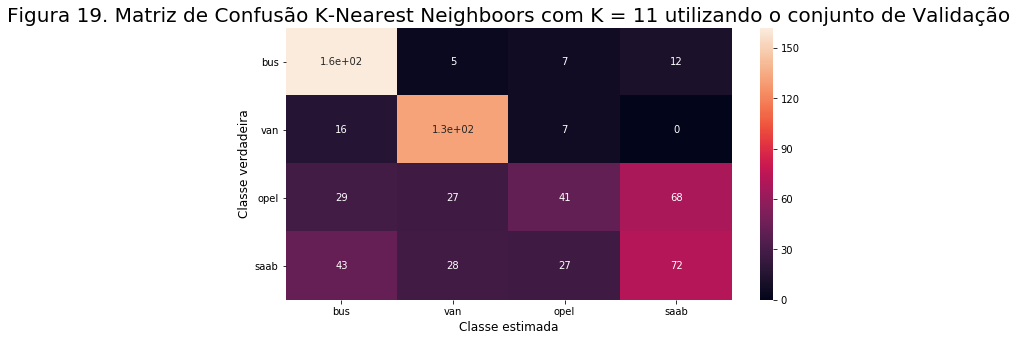

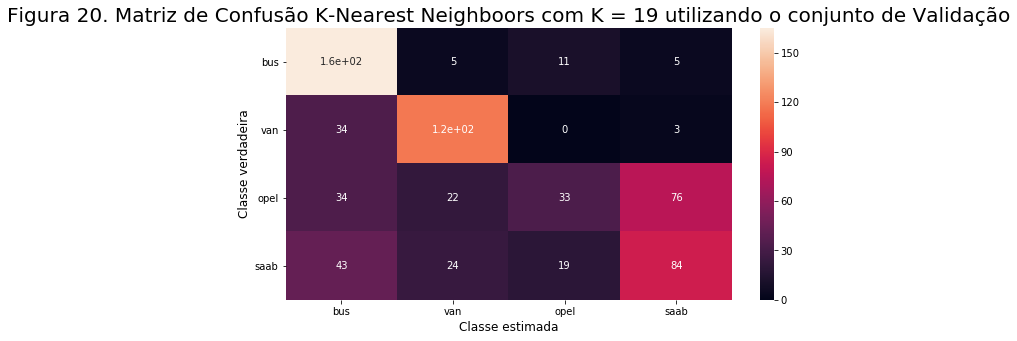

In [48]:
plot_confusion_matrix(all_cm_hist[0], ['bus', 'van', 'opel', 'saab'], 18, 'Matriz de Confusão K-Nearest Neighboors com K = 1 utilizando o conjunto de Validação')
plot_confusion_matrix(all_cm_hist[5], ['bus', 'van', 'opel', 'saab'], 19, 'Matriz de Confusão K-Nearest Neighboors com K = 11 utilizando o conjunto de Validação')
plot_confusion_matrix(all_cm_hist[9], ['bus', 'van', 'opel', 'saab'], 20, 'Matriz de Confusão K-Nearest Neighboors com K = 19 utilizando o conjunto de Validação')

Podemos observar que, com o aumento do hiper-parâmetro K, o número de classificações erradas também aumenta. 
Isto se dá, pois classes muito distintas, com grandes distâncias, são levadas em considerações para classificar um novo padrão.

Por outro lado, como podemos ver na matriz de confusão com K = 1 (Figura 18) que, ao utilizar um K pequeno, ruídos ou outliers presentes nos dados podem ter grande impacto ao classificar um padrão. Podemos ver que a classe Bus tem uma confusão considerável com a classe Saab, onde, ambas são visualmente distintas.

Na matriz de confusão ilustrada na Figura 20, a taxa de erro é muito grande, devido ao algoritmo levar em consideração classes que não representam bem o novo padrão, como discutido anteriormente.

In [49]:
id_better_acc = np.argmax(all_acc_hist[:10])
id_better_acc
print("Melhor K no para o conjunto de validação: {}. \tTaxa de Acertos (Validação): {}".format(Ks[id_better_acc], all_acc_hist[id_better_acc]))

Melhor K no para o conjunto de validação: 1. 	Taxa de Acertos (Validação): 0.8365384615384617


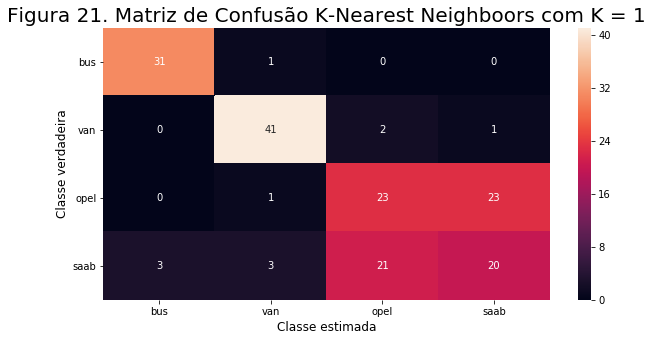

In [55]:
predictions = []
for i, test_entry in enumerate(Ck_test):
    nearest_neighboors = get_k_nearest_neighboors(1, 1, test_entry, Ck_tr, Yk_tr )
    label = get_classification(nearest_neighboors)
    predictions.append((label, Yk_test[i]))
    
cm_test_knn = generate_confusion_matrix(predictions, True)
plot_confusion_matrix(cm_test_knn, ['bus', 'van', 'opel', 'saab'], 21, 'Matriz de Confusão K-Nearest Neighboors com K = 1')

Através da matriz de confusão do K-Nearest Neighboors, é possível identificar que há um certo erro em classificar padrões entre Opel e Saab.

Em ambas as classes em que ocorre o maior erro, o classificador alcança aproximadamente 50% de acertos. É um cenário esperado, pois ambas as classes possuem características muito semelhantes. Uma alternativa é utilizar outras características que podem distinguir melhor a diferença entre as mesmas.

Por outro lado, as classes Bus e Van, são muito bem separáveis das outras.

Uma hipótese de algumas classificações erradas para as classes Bus e Van, é a presença de padrões de outras classes que não definem muito bem a mesma, juntamente com um K pequeno, sendo sensível à outliers e ruídos.

In [51]:
avg_acc_knn, error_rate_knn, precision_M_knn, recall_M_knn, Fscore_M_knn,_,_,_ = multiclass_measures(cm_test_knn, 1)
print("Métricas Globais:")
print("Para os dados de teste:")
print("Average accuracy = " +str(avg_acc_knn))
print("Error rate = " +str(error_rate_knn))
print("Precision_M = " +str(precision_M_knn))
print("Recall_M = " +str(recall_M_knn))
print("F1_M = " +str(Fscore_M_knn))

Métricas Globais:
Para os dados de teste:
Average accuracy = 0.838235294117647
Error rate = 0.16176470588235292
Precision_M = 0.6894036270634736
Recall_M = 0.7038654497098646
F1_M = 0.6965594831379227


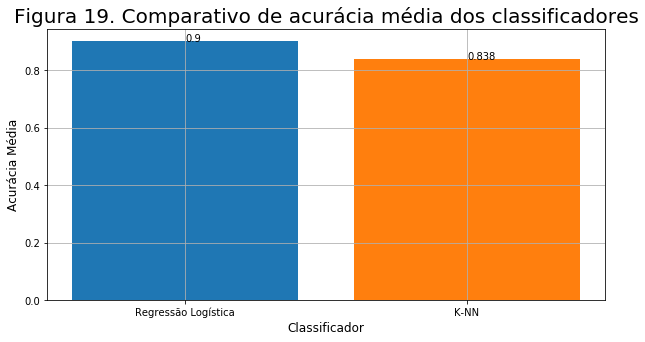

In [54]:
plt.figure(22, figsize=(10,5))
plt.title('Figura 19. Comparativo de acurácia média dos classificadores', fontsize=20)
plt.ylabel('Acurácia Média', fontsize=12)
plt.xlabel('Classificador', fontsize=12)
plt.grid()
plt.bar(['Regressão Logística'], [avg_acc_test])
plt.bar(['K-NN'], [avg_acc_knn])
plt.text(0, avg_acc_test, round(avg_acc_test, 3))
plt.text(1, avg_acc_knn, round(avg_acc_knn, 3))
plt.show()



Houve uma diferença significativa entre os classificadores K-NN e Regressão Logística.

Vale destacar que o algoritmo KNN é mais simples, consequentemente, tem um custo computacional menor, além de que não é necessário uma etapa de ajuste de parâmetros e nem otimização, apenas ajuste de hiper-parâmetro.

Por outro lado, a regressão logística necessita de uma etapa de ajuste dos parâmetros $w$, tendo um maior custo computacional quando comparado ao KNN.

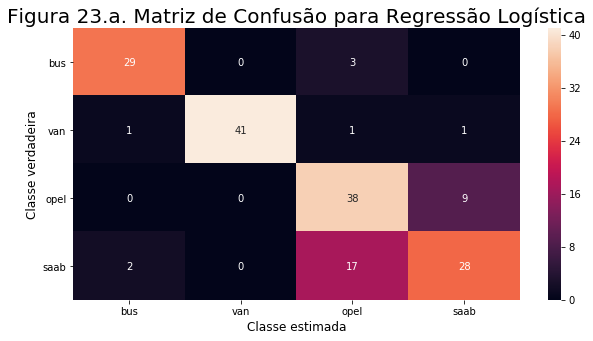

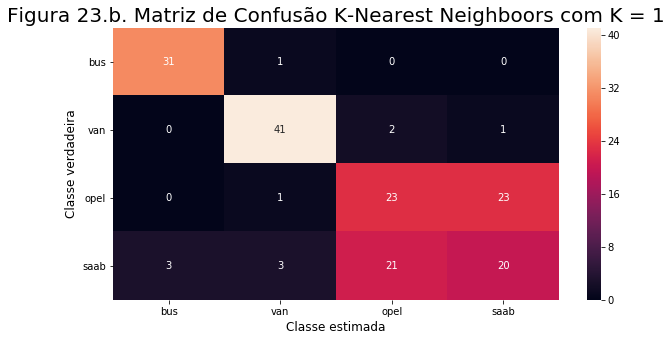

In [56]:

plot_confusion_matrix(cm_test, ['bus', 'van', 'opel', 'saab'], '23.a', 'Matriz de Confusão para Regressão Logística')
plot_confusion_matrix(cm_test_knn, ['bus', 'van', 'opel', 'saab'], '23.b', 'Matriz de Confusão K-Nearest Neighboors com K = 1')

Podemos notar que ambos os classificadores tem o mesmo problema de distinguir as classes Opel de Saab, além de distinguir bem as classes Bus e Van. Especificamente, a regressão logística consegue uma melhor separação entre as classes problemáticas.